In [1]:
#Importamos las librerias que nos van a hacer falta
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lo primero dividimos los datos de train y test para no liarla ni tener tentaciones 
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("./data/airbnb-listings-extract.csv", sep= ";")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/airbnb-listings-train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb-listings-test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

#house_data = pd.read_csv('./data/king_county_train.csv', sep=';', decimal='.')
#house_data.head(5).T


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [3]:
#Cargo los datos y los visualizo

house_data = pd.read_csv("./data/airbnb-listings-train.csv", sep= ";")

#intentado leerlo de primeras m e daba este error: ParserError: Error tokenizing data. C error: Expected 32 fields in line 4, saw 34
#Veo que el formato de los datos no es correcto y es porque esta separado por ; no por comas, lo cambio.
#Hago una primera exploracion del DF
#Tamaño
house_data.shape

(11824, 89)

In [4]:
#Las primeras filas
house_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [5]:
#De un primer vistazo parece ser que hay un outlyer en el numero de anuncios por anfitrion porque de media son 12 conuna desviacion de 34
# y el maximo es 519 ya veremos que se hace con eso, tambien puedo observar que hay dos columnas iguales Host Listings Count	Host Total Listings Count
#por lo que eliminar un de ellas es obvio junto con la que esta vacia
#Tambien parece que hay otro outlyer en el numero de reseñas, aunque podria ser real pero canta mucho y puede afectar a los datos, ya vere que hago con ello tb
#Parece ser que la columnas Calculated host listings count es la columna real de anuncios por anfitrion que nos diria que efectivamente hay un error
#en la primera premisa

In [6]:
house_data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [7]:
house_data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [8]:
#voy a ver los nulos
house_data.isnull().any()

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                               True
                                  ...  
Cancellation Policy               False
Calculated host listings count     True
Reviews per Month                  True
Geolocation                       False
Features                           True
Length: 89, dtype: bool

In [9]:
house_data.isnull().sum().sort_values(ascending=False)

Has Availability        11815
Host Acceptance Rate    11794
Jurisdiction Names      11650
License                 11547
Square Feet             11350
                        ...  
Minimum Nights              0
Extra People                0
Guests Included             0
Room Type                   0
ID                          0
Length: 89, dtype: int64

In [10]:

def porcentaje_ceros_nulos_columna(df,umbral=0.5):
    """
    Funcion que nos dice el porcentaje de ceros o nulos que hay por columna en funcion de un umbral
    Recibe un DataFrame 
    Devuelve el porcentaje de las columnas en funcion del umbral y una lista con las columnas que superan el umbral
    """
    columnas_eliminar = []
    for col in df.columns:
        ceros = (df[col] == 0).sum()
        nulos = df[col].isnull().sum()
        porcentaje_ceros = ceros / len(df)
        porcentaje_nulos = nulos / len(df)        
        
        if porcentaje_ceros > umbral:
            print(f"{col} tiene {porcentaje_ceros:.2%} ceros.")
            columnas_eliminar.append(col)
        if porcentaje_nulos > umbral:
            print(f"{col} tiene {porcentaje_nulos:.2%} nulos.")
            columnas_eliminar.append(col)
    return columnas_eliminar

In [11]:
columnas_eliminar = porcentaje_ceros_nulos_columna(house_data, umbral = 0.05)

Space tiene 26.27% nulos.
Neighborhood Overview tiene 38.19% nulos.
Notes tiene 61.58% nulos.
Transit tiene 38.74% nulos.
Access tiene 43.65% nulos.
Interaction tiene 44.25% nulos.
House Rules tiene 35.04% nulos.
Thumbnail Url tiene 19.41% nulos.
Medium Url tiene 19.41% nulos.
XL Picture Url tiene 19.41% nulos.
Host About tiene 35.18% nulos.
Host Response Time tiene 12.75% nulos.
Host Response Rate tiene 12.75% nulos.
Host Acceptance Rate tiene 99.75% nulos.
Host Neighbourhood tiene 26.07% nulos.
Neighbourhood tiene 35.17% nulos.
Neighbourhood Group Cleansed tiene 6.92% nulos.
Bedrooms tiene 6.88% ceros.
Square Feet tiene 95.99% nulos.
Weekly Price tiene 75.63% nulos.
Monthly Price tiene 75.74% nulos.
Security Deposit tiene 57.27% nulos.
Cleaning Fee tiene 41.02% nulos.
Extra People tiene 51.45% ceros.
Has Availability tiene 99.92% nulos.
Availability 30 tiene 26.84% ceros.
Availability 60 tiene 19.71% ceros.
Availability 90 tiene 14.44% ceros.
Availability 365 tiene 9.18% ceros.
Numbe

In [12]:
#Eliminamos las columnas que esten por debajo del umbral deseado yo eligo 0.4
#Cojo un valor pequeño para hacerlo sencillo, espero poder implementar un knn con mas columnas o una regresion o algun arbol en categoricas
house_data_sc = house_data.drop(columnas_eliminar, axis = 1)
house_data_sc.isnull().sum().sort_values(ascending=False)

Summary                           469
Zipcode                           398
Amenities                         141
State                             119
Bathrooms                          44
Market                             44
Beds                               37
Host Location                      34
Picture Url                        18
Price                              15
Host Verifications                  7
Description                         6
City                                4
Calculated host listings count      4
Host Listings Count                 3
Host Total Listings Count           3
Host Since                          3
Host Picture Url                    3
Host Thumbnail Url                  3
Host Name                           3
Country                             1
Features                            1
Name                                1
Neighbourhood Cleansed              0
Bed Type                            0
Geolocation                         0
Scrape ID   

In [13]:
#voy a usar la funcion para ver de nuevo
porcentaje_ceros_nulos_columna(house_data_sc, umbral = 0)

Name tiene 0.01% nulos.
Summary tiene 3.97% nulos.
Description tiene 0.05% nulos.
Picture Url tiene 0.15% nulos.
Host Name tiene 0.03% nulos.
Host Since tiene 0.03% nulos.
Host Location tiene 0.29% nulos.
Host Thumbnail Url tiene 0.03% nulos.
Host Picture Url tiene 0.03% nulos.
Host Listings Count tiene 0.13% ceros.
Host Listings Count tiene 0.03% nulos.
Host Total Listings Count tiene 0.13% ceros.
Host Total Listings Count tiene 0.03% nulos.
Host Verifications tiene 0.06% nulos.
City tiene 0.03% nulos.
State tiene 1.01% nulos.
Zipcode tiene 3.37% nulos.
Market tiene 0.37% nulos.
Country tiene 0.01% nulos.
Bathrooms tiene 0.45% ceros.
Bathrooms tiene 0.37% nulos.
Beds tiene 0.31% nulos.
Amenities tiene 1.19% nulos.
Price tiene 0.13% nulos.
Guests Included tiene 0.01% ceros.
Calculated host listings count tiene 0.03% nulos.
Features tiene 0.01% nulos.


['Name',
 'Summary',
 'Description',
 'Picture Url',
 'Host Name',
 'Host Since',
 'Host Location',
 'Host Thumbnail Url',
 'Host Picture Url',
 'Host Listings Count',
 'Host Listings Count',
 'Host Total Listings Count',
 'Host Total Listings Count',
 'Host Verifications',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Country',
 'Bathrooms',
 'Bathrooms',
 'Beds',
 'Amenities',
 'Price',
 'Guests Included',
 'Calculated host listings count',
 'Features']

In [14]:
house_data_sc.dtypes


ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Description                        object
Experiences Offered                object
Picture Url                        object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                      object
Host Thumbnail Url                 object
Host Picture Url                   object
Host Listings Count               float64
Host Total Listings Count         float64
Host Verifications                 object
Street                             object
Neighbourhood Cleansed             object
City                               object
State                              object
Zipcode                           

In [15]:
#Como hay una fecha como objeto la voy a formatear a tipo datetime para poder extraer informacion de ella y de la influencia d el antiguiendad del host
house_data_sc["Host Since"] = pd.to_datetime(house_data_sc["Host Since"], errors='coerce')

#Antes se nada separo las columnas categoricas y numericas
numericas = house_data_sc.select_dtypes(include=['int64','float64','datetime64'])
categoricas = house_data_sc.select_dtypes(include=['object','string','category'])


            

In [16]:
#Elimino todas las columnas que no tienen informacion para el modelo o que tienen mucho ceros o Na

categoricas_eliminar = ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Description', 'Experiences Offered',
                        'Picture Url', 'Host URL', 'Host Name','Host URL', 'Host Name',
                        'Host Thumbnail Url', 'Host Picture Url', 'Host Verifications',
                        'Amenities', 'Calendar Updated', 'Calendar last Scraped',"Host Location","Geolocation","Features","Street"]
numericas_aliminar = ['ID', 'Scrape ID', 'Host ID']
categorica_f = categoricas.drop(categoricas_eliminar, axis=1)
numericas_f = numericas.drop(numericas_aliminar, axis=1)

In [17]:
numericas_f.dtypes

Host Since                        datetime64[ns]
Host Listings Count                      float64
Host Total Listings Count                float64
Latitude                                 float64
Longitude                                float64
Accommodates                               int64
Bathrooms                                float64
Beds                                     float64
Price                                    float64
Guests Included                            int64
Minimum Nights                             int64
Maximum Nights                             int64
Calculated host listings count           float64
dtype: object

In [18]:
categorica_f.dtypes


Neighbourhood Cleansed    object
City                      object
State                     object
Zipcode                   object
Market                    object
Smart Location            object
Country Code              object
Country                   object
Property Type             object
Room Type                 object
Bed Type                  object
Cancellation Policy       object
dtype: object

In [19]:
porcentaje_ceros_nulos_columna(numericas_f, umbral = 0)

Host Since tiene 0.03% nulos.
Host Listings Count tiene 0.13% ceros.
Host Listings Count tiene 0.03% nulos.
Host Total Listings Count tiene 0.13% ceros.
Host Total Listings Count tiene 0.03% nulos.
Bathrooms tiene 0.45% ceros.
Bathrooms tiene 0.37% nulos.
Beds tiene 0.31% nulos.
Price tiene 0.13% nulos.
Guests Included tiene 0.01% ceros.
Calculated host listings count tiene 0.03% nulos.


['Host Since',
 'Host Listings Count',
 'Host Listings Count',
 'Host Total Listings Count',
 'Host Total Listings Count',
 'Bathrooms',
 'Bathrooms',
 'Beds',
 'Price',
 'Guests Included',
 'Calculated host listings count']

In [20]:
#Como las columnas que necista rellenar los nulos son pocos, lo voy a hacer con la media 

for col in numericas_f.columns:
    numericas_f[col].fillna(numericas_f[col].mean(), inplace = True)

#compruebo queno hay nulos
numericas_f.isnull().any()

Host Since                        False
Host Listings Count               False
Host Total Listings Count         False
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Beds                              False
Price                             False
Guests Included                   False
Minimum Nights                    False
Maximum Nights                    False
Calculated host listings count    False
dtype: bool

In [21]:
porcentaje_ceros_nulos_columna(categorica_f, umbral = 0)

City tiene 0.03% nulos.
State tiene 1.01% nulos.
Zipcode tiene 3.37% nulos.
Market tiene 0.37% nulos.
Country tiene 0.01% nulos.


['City', 'State', 'Zipcode', 'Market', 'Country']

In [22]:
categorica_f.columns


Index(['Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Property Type',
       'Room Type', 'Bed Type', 'Cancellation Policy'],
      dtype='object')

In [23]:
#Como he escogido columnas con pocos nulos voy a imputar con la moda en las variables categoricas

for col in categorica_f.columns:
    categorica_f[col].fillna(categorica_f[col].mode().iloc[0],inplace = True)

categorica_f.isnull().any()

Neighbourhood Cleansed    False
City                      False
State                     False
Zipcode                   False
Market                    False
Smart Location            False
Country Code              False
Country                   False
Property Type             False
Room Type                 False
Bed Type                  False
Cancellation Policy       False
dtype: bool

In [24]:
categorica_f.head()

,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Bed Type,Cancellation Policy
0,Jerónimos,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,moderate
1,Sol,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,flexible
2,Vista Alegre,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,Apartment,Shared room,Real Bed,moderate
3,Embajadores,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict
4,Gaztambide,Madrid,28,28015,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict


No se pudo


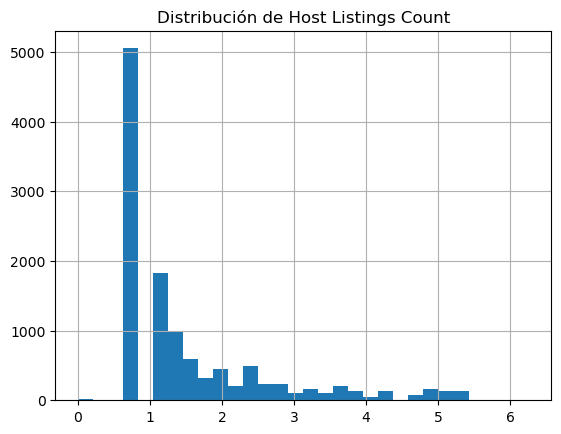

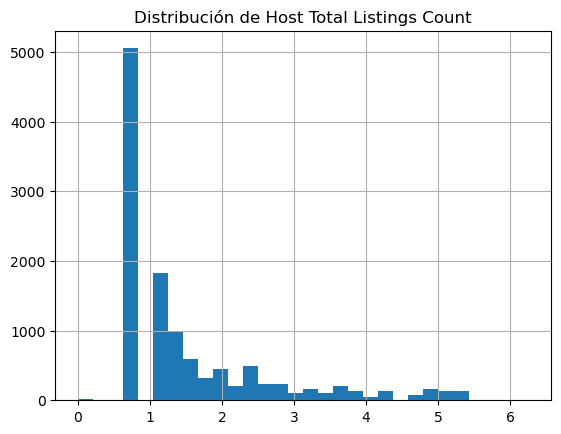

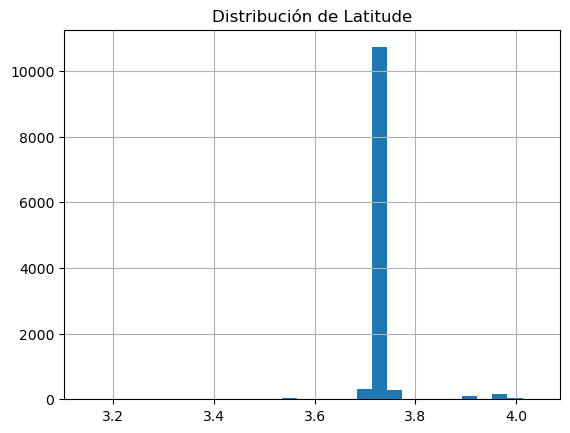

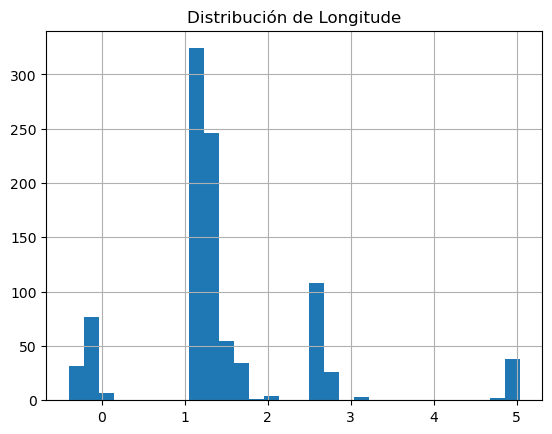

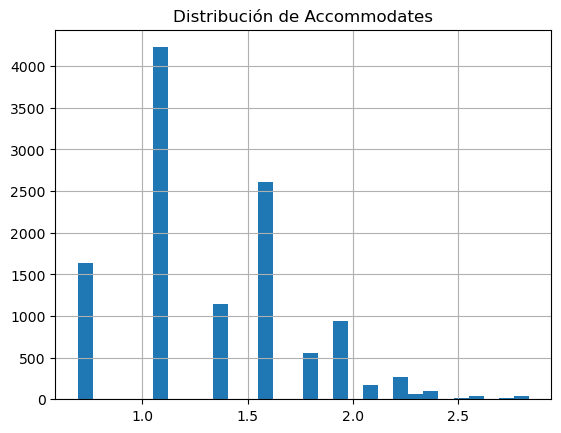

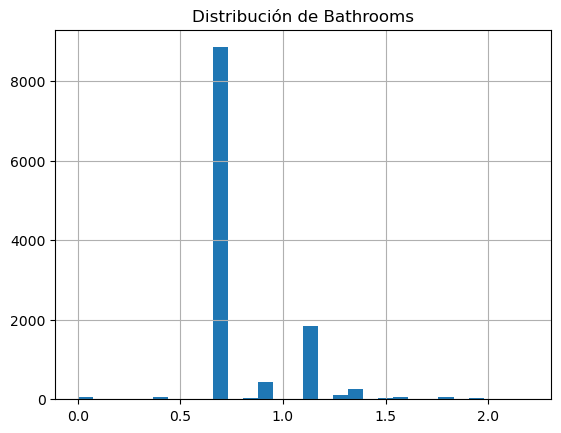

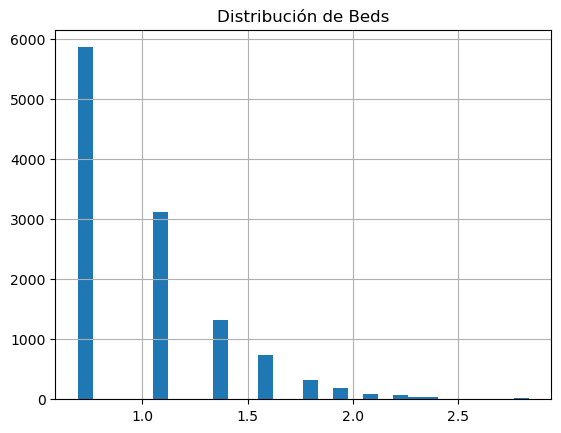

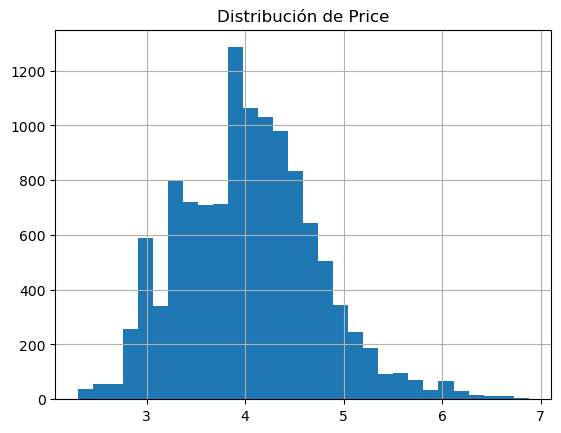

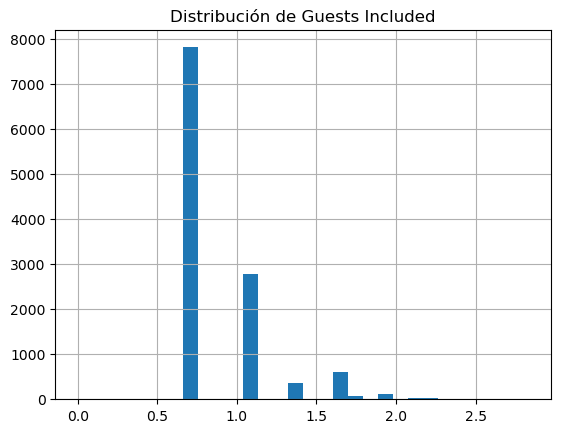

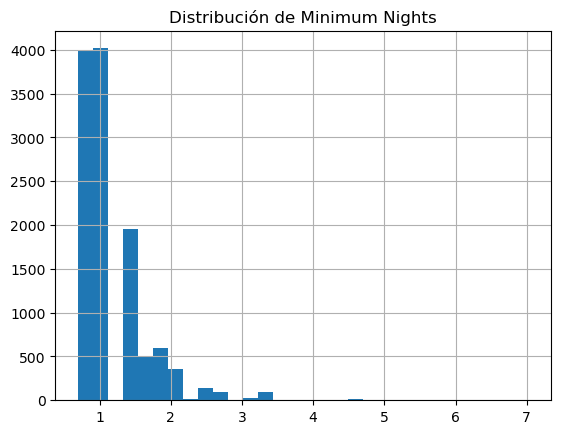

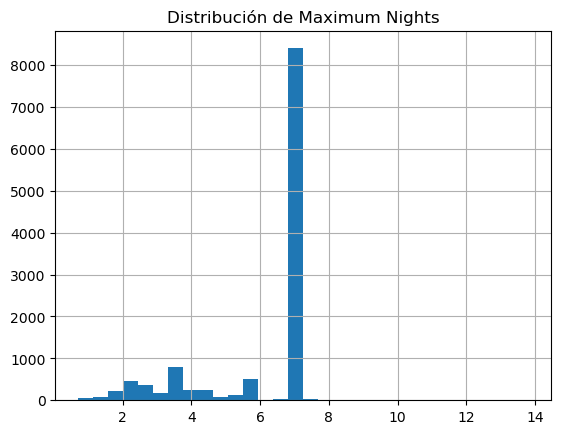

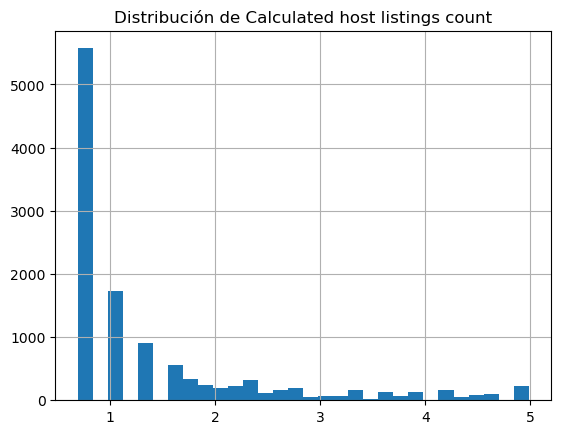

In [25]:
#Para ver si tenemos outlyers pintamos unas graficas que nos ayudaran a detectarlo facilmente
import seaborn as sns
import matplotlib.pyplot as plt

def box(df):
    for col in df.columns:
        try:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=np.log1p(df[col]))
            plt.title(f'Boxplot de {col}')
            plt.show()
        except:
            print("No se pudo")
#he tenido que pasar a escala logaritimica en las funciones para que se viesen mas claras las graficas        

def hist(df):
    for col in df.columns:
        try:
            np.log1p(df[col]).hist(bins=30)
            plt.title(f'Distribución de {col}')
            plt.show()
        except:
             print("No se pudo")
            
    
#box(numericas_f)
hist(numericas_f)

In [26]:
#En un primer momento se veia algun outlyer pero analizando las graficas se ve que ya no, o los que hay tienen sentido
#Esto se debe a mi selecion y filtrado porque he reducido ciertas caracteristicas para simplificar el ejercicio de primeras, o simplemenete no hay outlyers

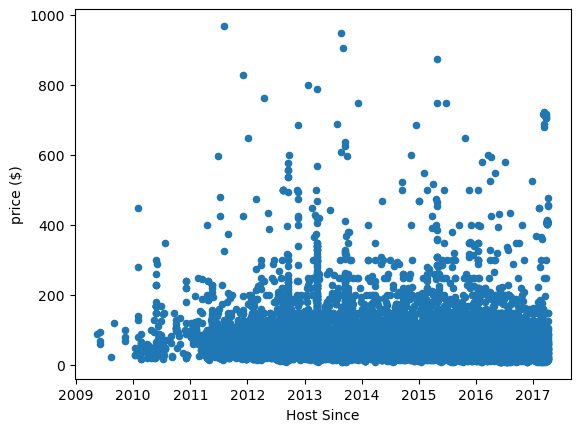

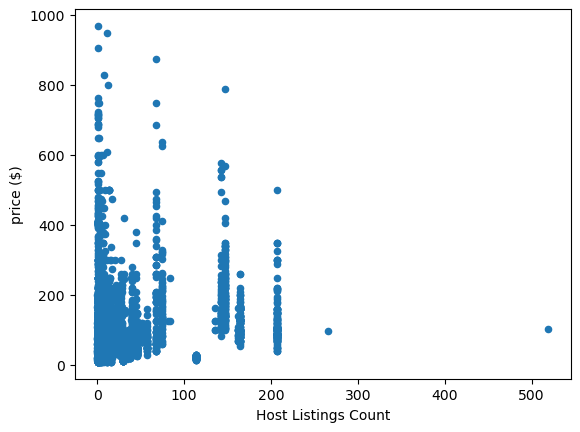

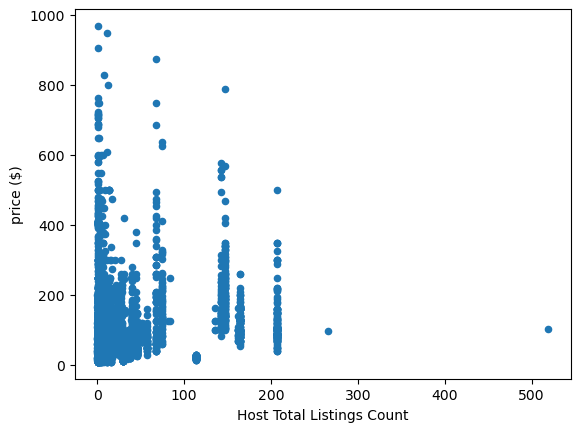

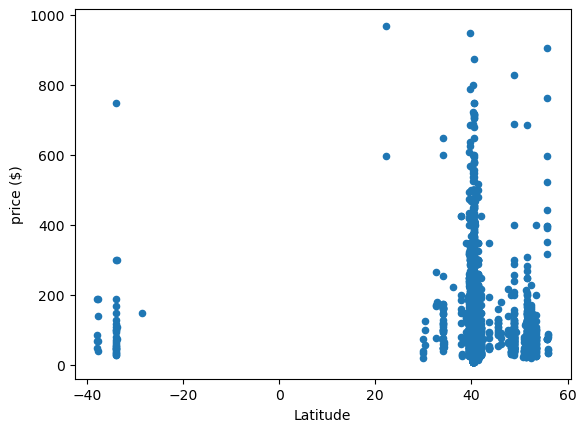

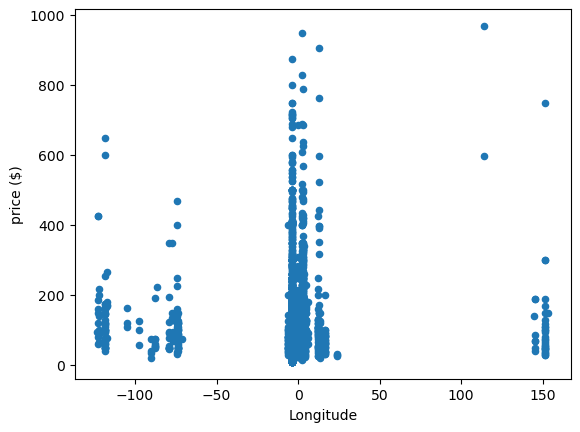

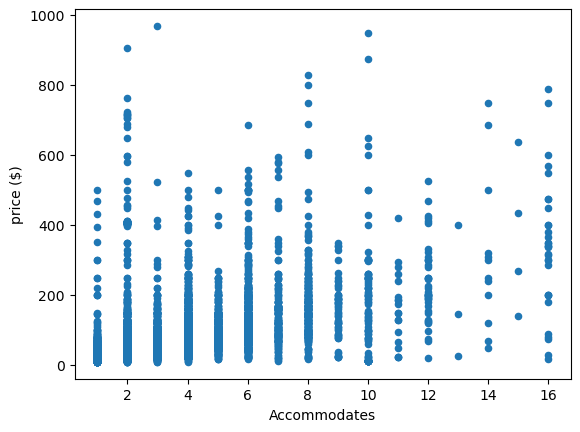

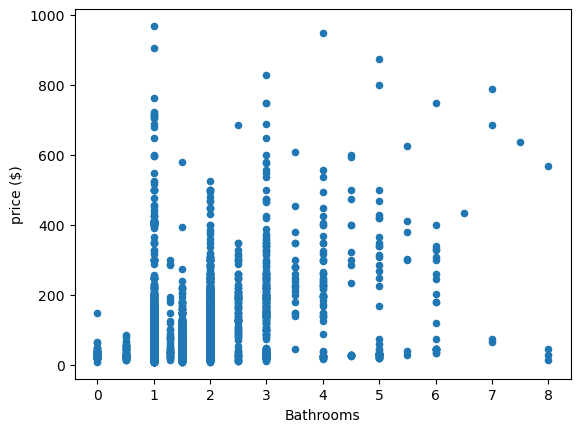

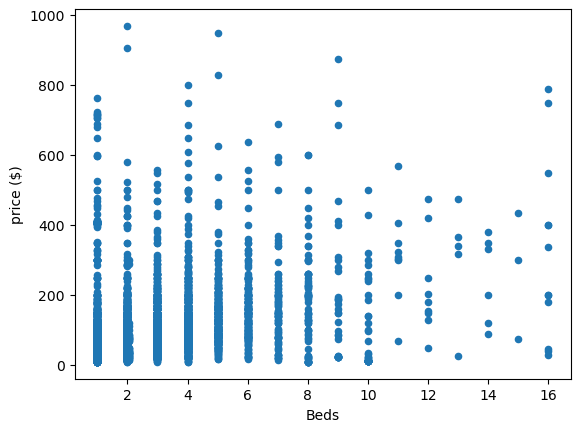

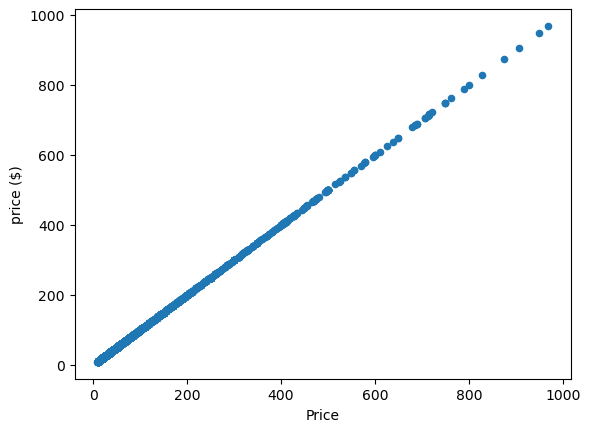

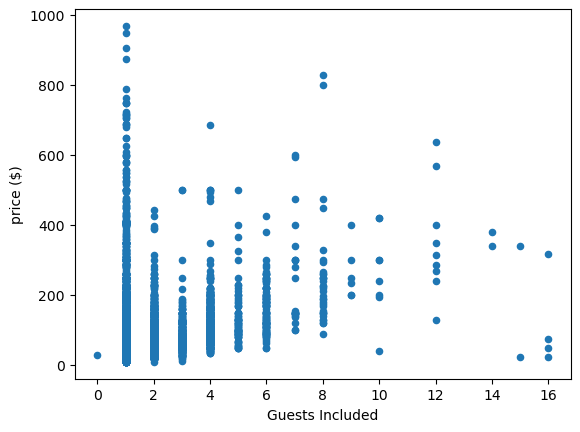

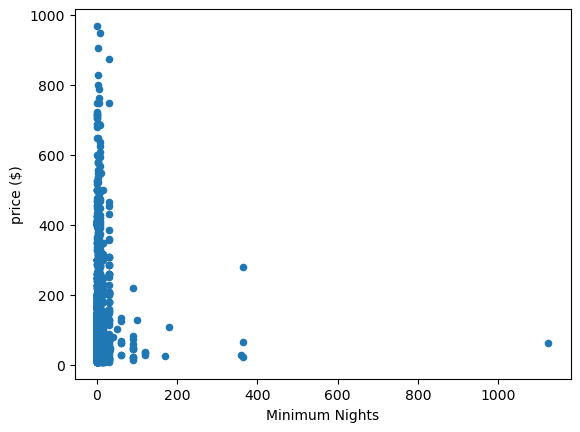

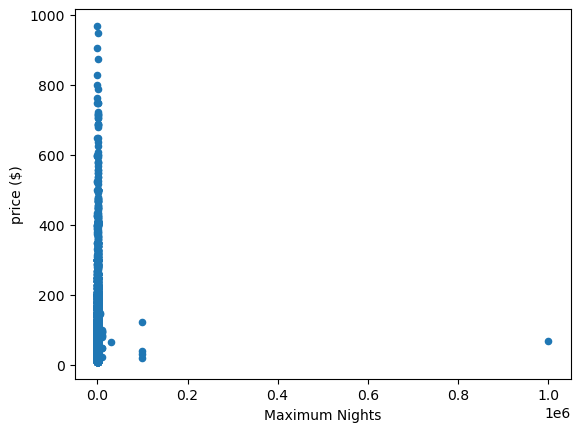

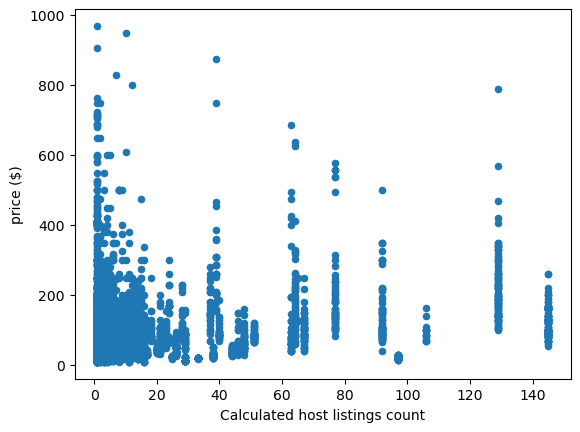

In [27]:
#Para ver la nube de puntos

def plot(df):
    for col in df.columns:
        try:
            df.plot(kind = 'scatter',x=col,y = 'Price')
            plt.xlabel(col)
            plt.ylabel('price ($)')
            plt.show()
        except:
            print("No funciono")
plot(numericas_f)

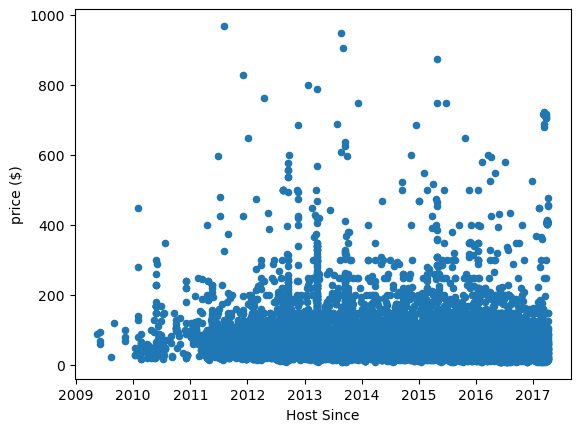

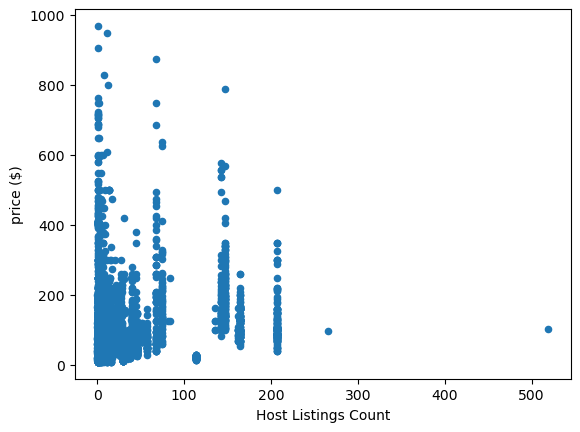

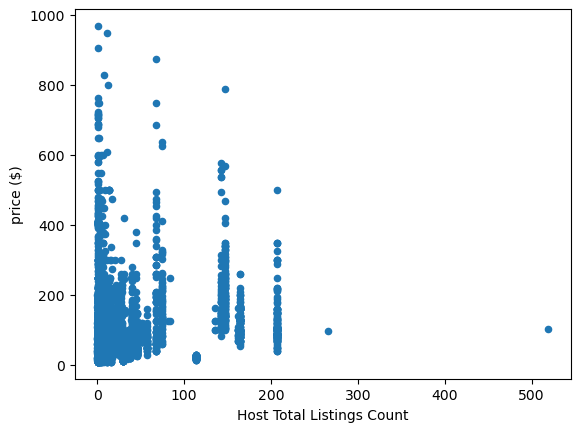

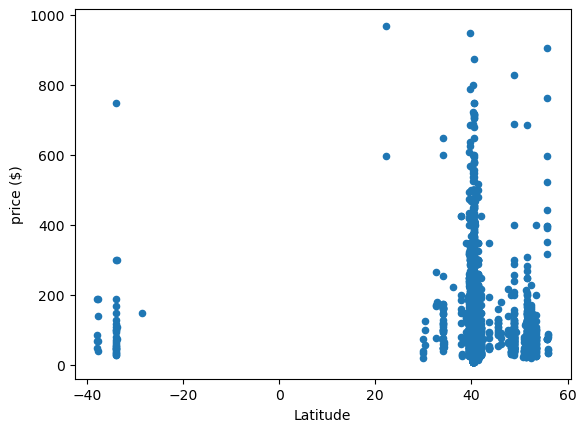

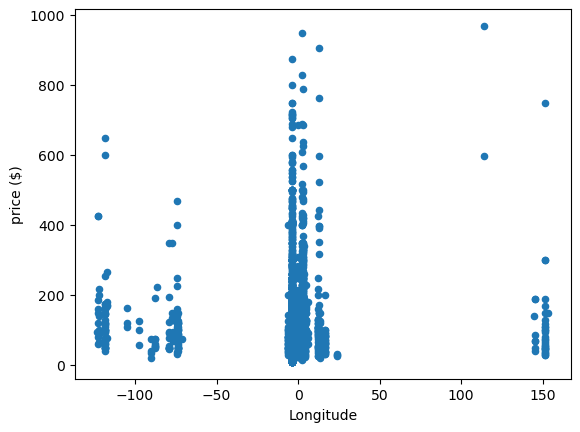

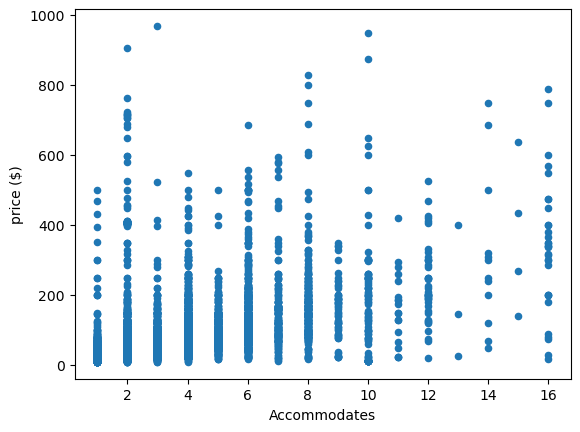

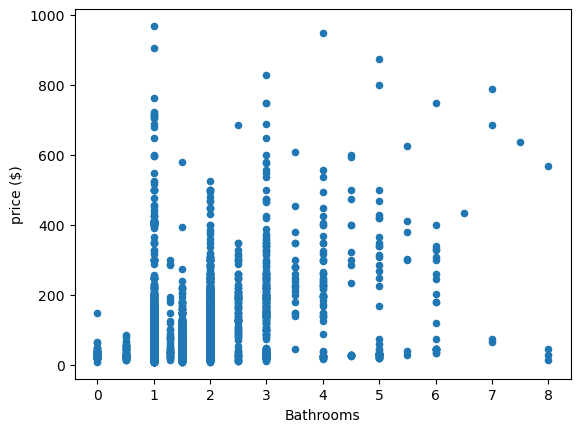

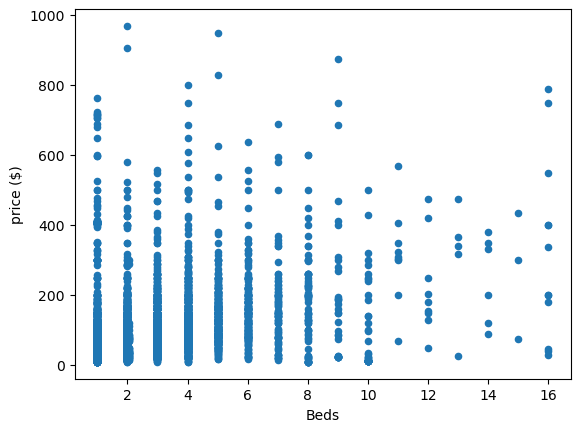

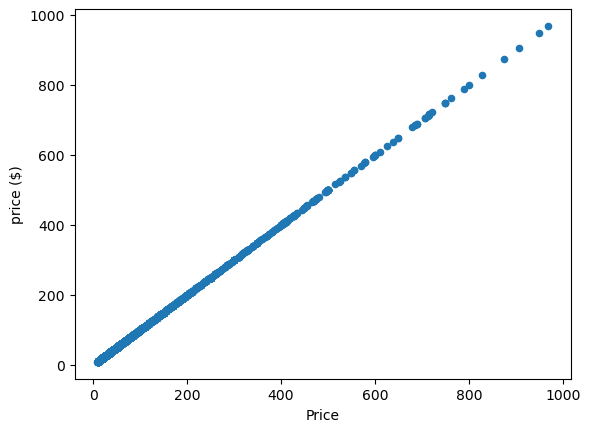

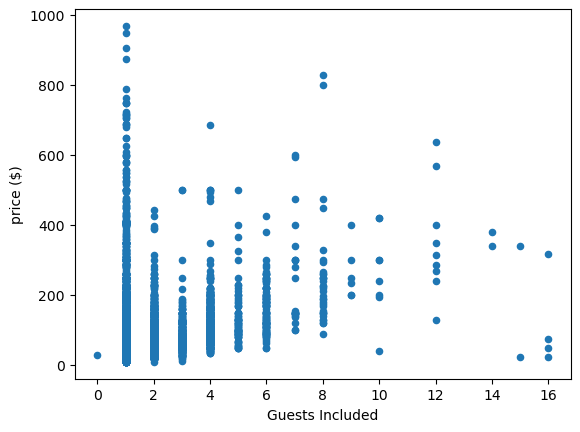

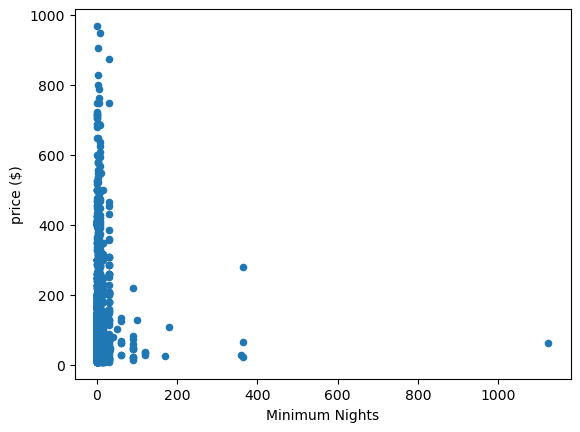

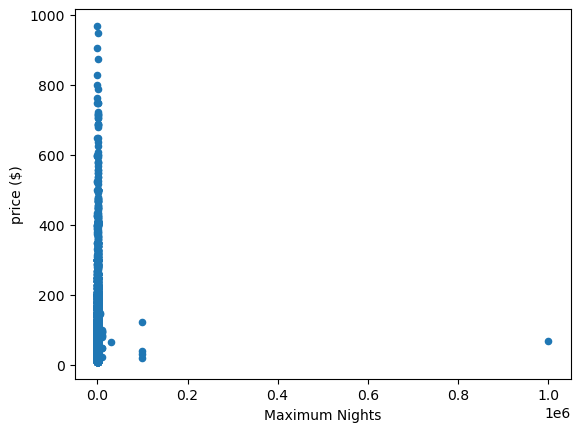

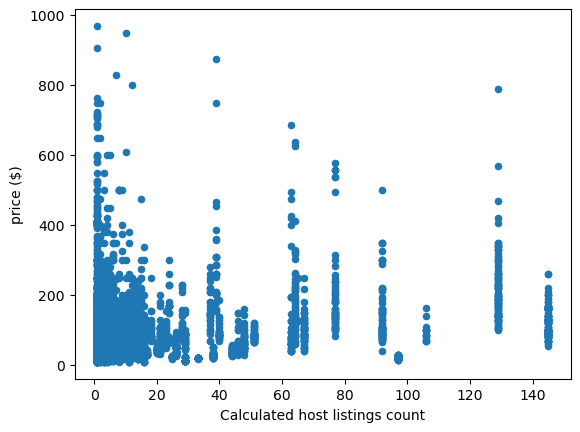

In [28]:
#Parece ser que en host listing counts si que tenemso un outlayer, lo suyo seria quitarlo porque es un valor que puede desequilibrar el modelo, de hecho deberia de quitarla de dos porque
#hay dos columnas con los mismos datos, mas adelante quitare una de las columnas cuando se confirme la correlacion

numericas_no_outlayers = numericas_f.loc[numericas_f['Host Listings Count'] < 350]
plot(numericas_f)

In [29]:
#Ahora miramos la correlacion
numericas_no_outlayers.corr()

,Host Since,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Beds,Price,Guests Included,Minimum Nights,Maximum Nights,Calculated host listings count
Host Since,1.000000,-0.049212,-0.049212,-0.012024,0.036090,-0.109321,-0.058568,-0.083837,-0.082723,-0.079858,-0.030346,-0.005526,-0.094039
Host Listings Count,-0.049212,1.000000,1.000000,0.002834,0.049229,0.230150,0.231473,0.173930,0.231181,0.075182,0.023545,0.005025,0.928032
Host Total Listings Count,-0.049212,1.000000,1.000000,0.002834,0.049229,0.230150,0.231473,0.173930,0.231181,0.075182,0.023545,0.005025,0.928032
Latitude,-0.012024,0.002834,0.002834,1.000000,-0.493585,0.006898,-0.006336,0.000534,-0.013196,0.004710,-0.003343,0.000004,-0.001034
Longitude,0.036090,0.049229,0.049229,-0.493585,1.000000,0.018479,0.027127,0.034313,0.004975,-0.007025,-0.004329,0.002385,0.050133
Accommodates,-0.109321,0.230150,0.230150,0.006898,0.018479,1.000000,0.431572,0.835921,0.526699,0.563482,0.006855,0.001251,0.254477
Bathrooms,-0.058568,0.231473,0.231473,-0.006336,0.027127,0.431572,1.000000,0.475127,0.376008,0.244923,0.030443,-0.003067,0.281935
Beds,-0.083837,0.173930,0.173930,0.000534,0.034313,0.835921,0.475127,1.000000,0.435816,0.454296,0.007489,0.001220,0.212604
Price,-0.082723,0.231181,0.231181,-0.013196,0.004975,0.526699,0.376008,0.435816,1.000000,0.294873,0.029637,0.000850,0.223771
Guests Included,-0.079858,0.075182,0.075182,0.004710,-0.007025,0.563482,0.244923,0.454296,0.294873,1.000000,0.003412,-0.004599,0.096433


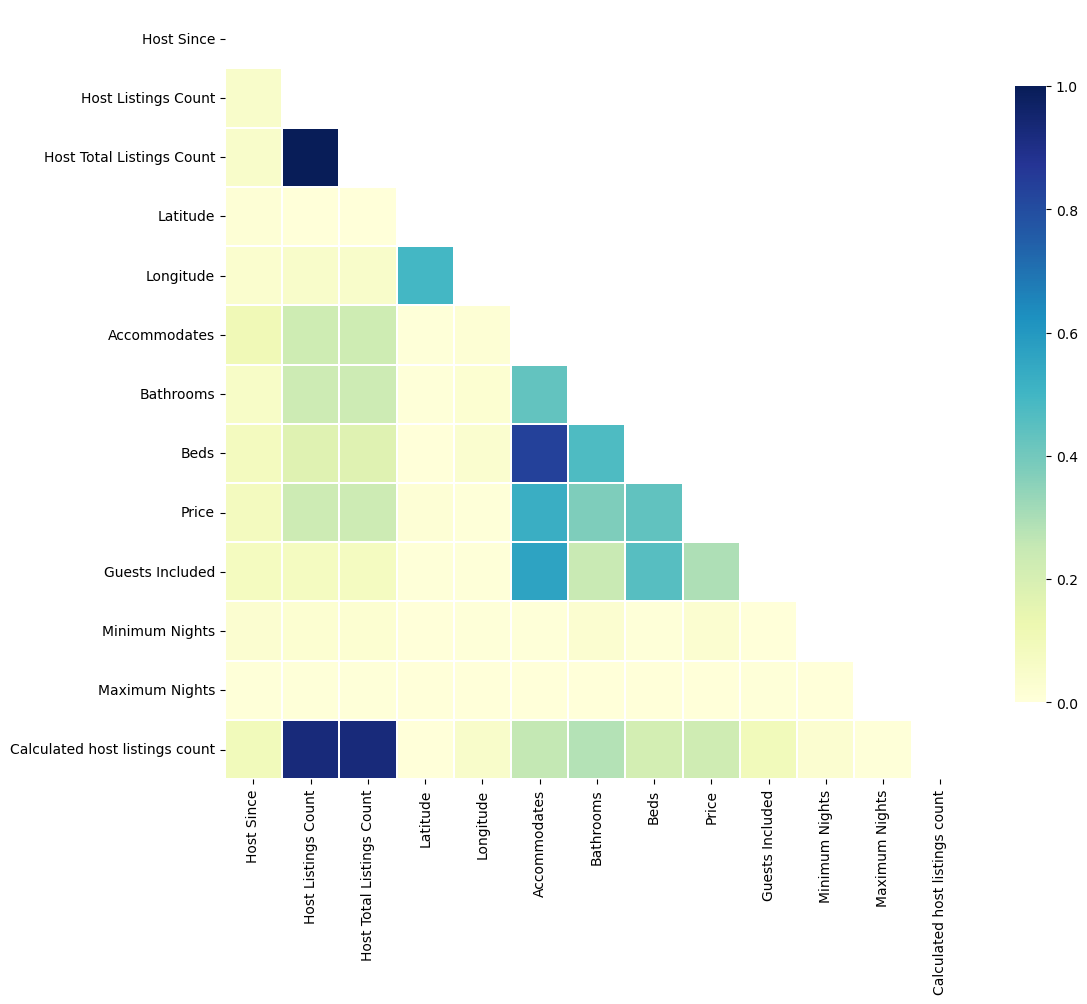

In [30]:
#Mejor respresentarlo 

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(numericas_no_outlayers.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

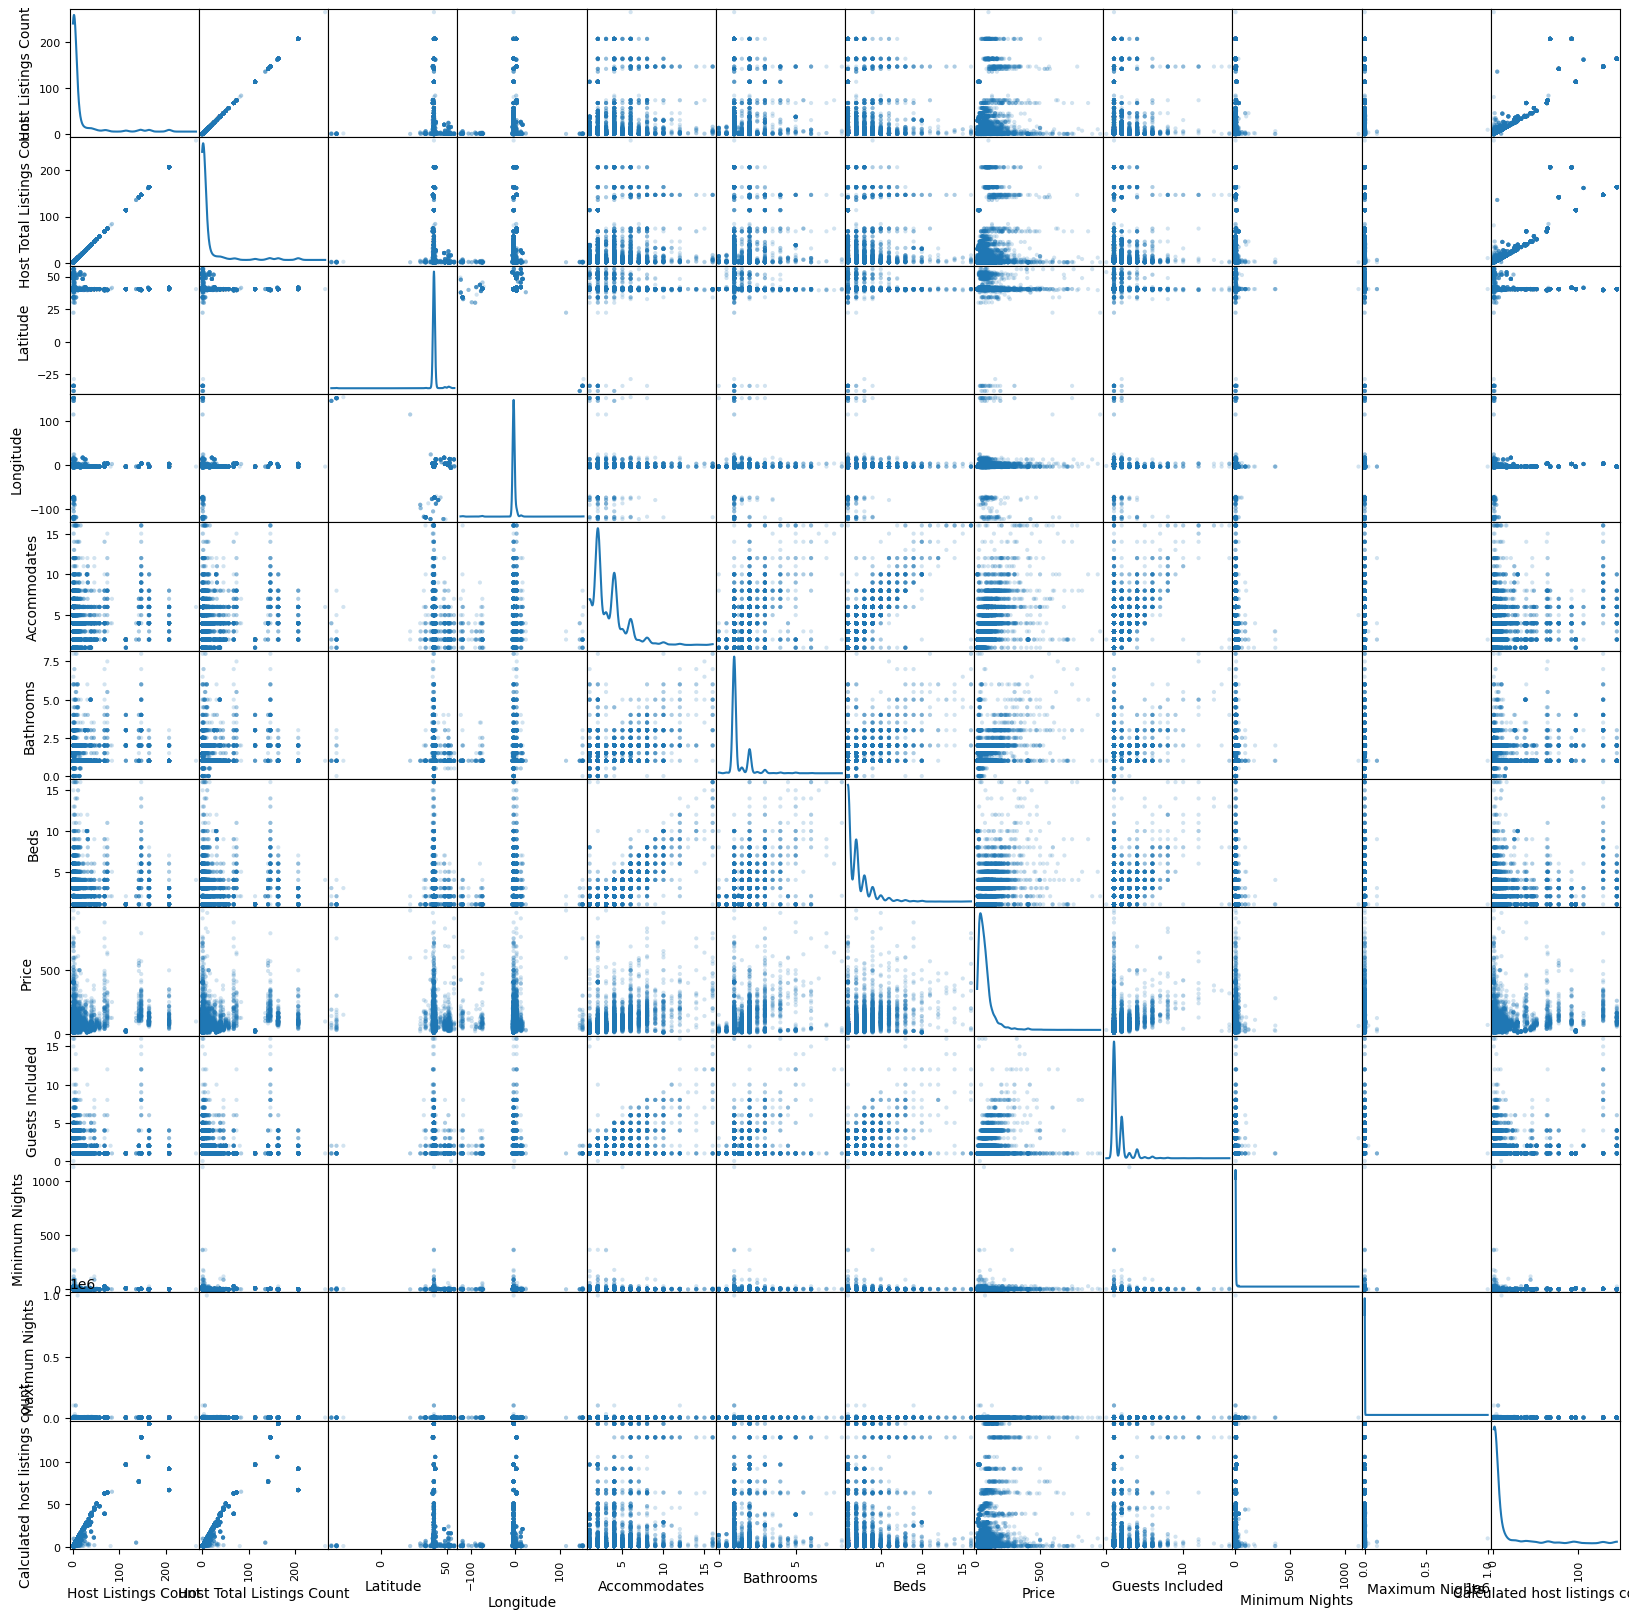

In [31]:
pd.plotting.scatter_matrix(numericas_no_outlayers, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [32]:
numericas_no_outlayers.columns

Index(['Host Since', 'Host Listings Count', 'Host Total Listings Count',
       'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Beds', 'Price',
       'Guests Included', 'Minimum Nights', 'Maximum Nights',
       'Calculated host listings count'],
      dtype='object')

In [33]:
#Obaservo en la matriz de correlacion que tenemos 2 variables muy correlaconadas con otra, y es normal ya que son los mismo datos como ya intuia.
#Las eliminamos del modelo

numericas_no_corr = numericas_no_outlayers.drop(['Calculated host listings count','Host Listings Count',"Host Since"], axis=1)
numericas_no_corr

,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Beds,Price,Guests Included,Minimum Nights,Maximum Nights
0,2.0,40.407732,-3.684819,4,1.0,2.0,60.0,1,2,1125
1,1.0,40.415802,-3.705340,4,1.0,2.0,50.0,1,1,1125
2,16.0,40.389048,-3.740374,1,1.5,8.0,10.0,1,3,30
3,114.0,40.412814,-3.703052,2,3.0,1.0,30.0,1,10,1125
4,2.0,40.438631,-3.713716,2,1.0,1.0,32.0,1,1,1125
...,...,...,...,...,...,...,...,...,...,...
11819,1.0,40.430559,-3.717107,3,1.0,2.0,52.0,1,3,1125
11820,2.0,40.391126,-3.754068,6,1.0,3.0,55.0,5,1,1125
11821,1.0,40.416271,-3.713093,2,1.0,1.0,69.0,2,1,1125
11822,1.0,40.413397,-3.711280,2,1.0,1.0,69.0,1,2,15


In [34]:
########## Crear la nueva columna en años podria ser interesante para el modelo en vez de la fecha
#numericas_no_corr['host_antiguedad_anos'] = ((pd.Timestamp('today') - numericas_no_corr['Host Since']).dt.days) / 365
#numericas_no_corr = numericas_no_corr.drop(columns=['Host Since'])
#numericas_no_corr.isnull().any()


In [35]:
"""corr = np.abs(numericas_no_corr.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()"""

'corr = np.abs(numericas_no_corr.drop([\'Price\'], axis=1).corr())\n\n# Generate a mask for the upper triangle\nmask = np.zeros_like(corr, dtype=bool)\nmask[np.triu_indices_from(mask)] = True\n\n# Set up the matplotlib figure\nf, ax = plt.subplots(figsize=(12, 10))\n\n# Draw the heatmap with the mask and correct aspect ratio\nsns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,\n            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})\n\nplt.show()'

In [36]:
#Ahora vamos con las variables categoricas

categorica_f

,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Bed Type,Cancellation Policy
0,Jerónimos,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,moderate
1,Sol,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,flexible
2,Vista Alegre,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,Apartment,Shared room,Real Bed,moderate
3,Embajadores,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict
4,Gaztambide,Madrid,28,28015,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict
...,...,...,...,...,...,...,...,...,...,...,...,...
11819,Argüelles,Madrid,Comunidad de Madrid,28008,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,moderate
11820,Aluche,Madrid,Comunidad de Madrid,28047,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,strict
11821,Palacio,Madrid,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,strict
11822,Palacio,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,strict


In [37]:
#PAra ver como influye la politica de cancelacion he hecho un target enconder, lo hago de la variables por separado 
politicas= categorica_f['Cancellation Policy'].unique()
categoricas_encoded = categorica_f.copy()


for politica in politicas:

    nombre_columna = f'barrio_ratio_{politica}'
    proporciones = categorica_f.groupby('Neighbourhood Cleansed')['Cancellation Policy'].apply(lambda x: (x == politica).mean())
    categoricas_encoded[nombre_columna] = categorica_f['Neighbourhood Cleansed'].map(proporciones)


categoricas_encoded.head(15)

,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Bed Type,Cancellation Policy,barrio_ratio_moderate,barrio_ratio_flexible,barrio_ratio_strict,barrio_ratio_strict_new,barrio_ratio_super_strict_30,barrio_ratio_flexible_new,barrio_ratio_super_strict_60,barrio_ratio_moderate_new
0,Jerónimos,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,moderate,0.285714,0.185714,0.528571,0.0,0.0,0.0,0.000000,0.0
1,Sol,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,flexible,0.269082,0.173351,0.557568,0.0,0.0,0.0,0.000000,0.0
2,Vista Alegre,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,Apartment,Shared room,Real Bed,moderate,0.462963,0.407407,0.129630,0.0,0.0,0.0,0.000000,0.0
3,Embajadores,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict,0.358974,0.265182,0.375843,0.0,0.0,0.0,0.000000,0.0
4,Gaztambide,Madrid,28,28015,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict,0.306306,0.486486,0.207207,0.0,0.0,0.0,0.000000,0.0
5,Embajadores,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict,0.358974,0.265182,0.375843,0.0,0.0,0.0,0.000000,0.0
6,Palacio,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,flexible,0.298186,0.265306,0.436508,0.0,0.0,0.0,0.000000,0.0
7,Sol,Madrid,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict,0.269082,0.173351,0.557568,0.0,0.0,0.0,0.000000,0.0
8,Calvià,Illetes,Illes Balears,07181,Mallorca Island,"Illetes, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,strict,0.133333,0.066667,0.666667,0.0,0.0,0.0,0.133333,0.0
9,Goya,Madrid,Comunidad de Madrid,28006,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,strict,0.265957,0.361702,0.367021,0.0,0.0,0.0,0.005319,0.0


In [38]:
#Compruebo el numero de datos generado por cada columna nueva y es mejor eliminar del modelo las seis seiguientes
print(sum(categoricas_encoded['barrio_ratio_strict_new']==0))
print(sum(categoricas_encoded['barrio_ratio_super_strict_30']==0))
print(sum(categoricas_encoded['barrio_ratio_flexible_new']==0))
print(sum(categoricas_encoded['barrio_ratio_super_strict_60']==0))
print(sum(categoricas_encoded['barrio_ratio_moderate_new']==0))
#Esta se quedan porque tienen muchos menos cero que va a haber que rellenar con la media 
print(sum(categoricas_encoded['barrio_ratio_moderate']==0))
print(sum(categoricas_encoded['barrio_ratio_flexible']==0))
print(sum(categoricas_encoded['barrio_ratio_strict']==0))
categoricas_encoded.head()


11778
11148
11786
11231
11779
500
413
315


,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Bed Type,Cancellation Policy,barrio_ratio_moderate,barrio_ratio_flexible,barrio_ratio_strict,barrio_ratio_strict_new,barrio_ratio_super_strict_30,barrio_ratio_flexible_new,barrio_ratio_super_strict_60,barrio_ratio_moderate_new
0,Jerónimos,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,moderate,0.285714,0.185714,0.528571,0.0,0.0,0.0,0.0,0.0
1,Sol,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,flexible,0.269082,0.173351,0.557568,0.0,0.0,0.0,0.0,0.0
2,Vista Alegre,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,Apartment,Shared room,Real Bed,moderate,0.462963,0.407407,0.129630,0.0,0.0,0.0,0.0,0.0
3,Embajadores,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict,0.358974,0.265182,0.375843,0.0,0.0,0.0,0.0,0.0
4,Gaztambide,Madrid,28,28015,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,strict,0.306306,0.486486,0.207207,0.0,0.0,0.0,0.0,0.0


In [39]:
categoricas_encoded_f=categoricas_encoded.select_dtypes(include=['int64','float64'])
categoricas_encoded_fi = categoricas_encoded_f.drop(['barrio_ratio_strict_new','barrio_ratio_super_strict_30','barrio_ratio_flexible_new',
                          'barrio_ratio_super_strict_60','barrio_ratio_moderate_new'], axis=1)

categoricas_encoded_fi.isnull().sum()

barrio_ratio_moderate    0
barrio_ratio_flexible    0
barrio_ratio_strict      0
dtype: int64

In [40]:
numericas_no_corr.isnull().sum()

Host Total Listings Count    0
Latitude                     0
Longitude                    0
Accommodates                 0
Bathrooms                    0
Beds                         0
Price                        0
Guests Included              0
Minimum Nights               0
Maximum Nights               0
dtype: int64

In [41]:
df_limpio_train = pd.concat([categoricas_encoded_fi, numericas_no_corr], axis=1)
df_limpio_train.isnull().sum()

barrio_ratio_moderate        0
barrio_ratio_flexible        0
barrio_ratio_strict          0
Host Total Listings Count    1
Latitude                     1
Longitude                    1
Accommodates                 1
Bathrooms                    1
Beds                         1
Price                        1
Guests Included              1
Minimum Nights               1
Maximum Nights               1
dtype: int64

In [42]:
for col in df_limpio_train.columns:
    df_limpio_train[col].fillna(df_limpio_train[col].mean(), inplace = True)
df_limpio_train.isnull().any()

barrio_ratio_moderate        False
barrio_ratio_flexible        False
barrio_ratio_strict          False
Host Total Listings Count    False
Latitude                     False
Longitude                    False
Accommodates                 False
Bathrooms                    False
Beds                         False
Price                        False
Guests Included              False
Minimum Nights               False
Maximum Nights               False
dtype: bool

In [5]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
def porcentaje_ceros_nulos_columna(df,umbral=0.5):
    """
    Funcion que nos dice el porcentaje de ceros o nulos que hay por columna en funcion de un umbral
    Recibe un DataFrame 
    Devuelve el porcentaje de las columnas en funcion del umbral y una lista con las columnas que superan el umbral
    """
    columnas_eliminar = []
    for col in df.columns:
        ceros = (df[col] == 0).sum()
        nulos = df[col].isnull().sum()
        porcentaje_ceros = ceros / len(df)
        porcentaje_nulos = nulos / len(df)        
        
        if porcentaje_ceros > umbral:
            print(f"{col} tiene {porcentaje_ceros:.2%} ceros.")
            columnas_eliminar.append(col)
        if porcentaje_nulos > umbral:
            print(f"{col} tiene {porcentaje_nulos:.2%} nulos.")
            columnas_eliminar.append(col)
    return columnas_eliminar

In [9]:
#Para ver si tenemos outlyers pintamos unas graficas que nos ayudaran a detectarlo facilmente
import seaborn as sns
import matplotlib.pyplot as plt

def box(df):
    for col in df.columns:
        try:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=np.log1p(df[col]))
            plt.title(f'Boxplot de {col}')
            plt.show()
        except:
            print("No se pudo")

#he tenido que pasar a escala logaritimica en las funciones para que se viesen mas claras las graficas        
def hist(df):
    for col in df.columns:
        try:
            np.log1p(df[col]).hist(bins=30)
            plt.title(f'Distribución de {col}')
            plt.show()
        except:
             print("No se pudo")


#Para ver la nube de puntos
def plot(df):
    for col in df.columns:
        try:
            df.plot(kind = 'scatter',x=col,y = 'Price')
            plt.xlabel(col)
            plt.ylabel('price ($)')
            plt.show()
        except:
            print("No funciono")

Notes tiene 61.58% nulos.
Host Acceptance Rate tiene 99.75% nulos.
Square Feet tiene 95.99% nulos.
Weekly Price tiene 75.63% nulos.
Monthly Price tiene 75.74% nulos.
Security Deposit tiene 57.27% nulos.
Extra People tiene 51.45% ceros.
Has Availability tiene 99.92% nulos.
License tiene 97.66% nulos.
Jurisdiction Names tiene 98.53% nulos.


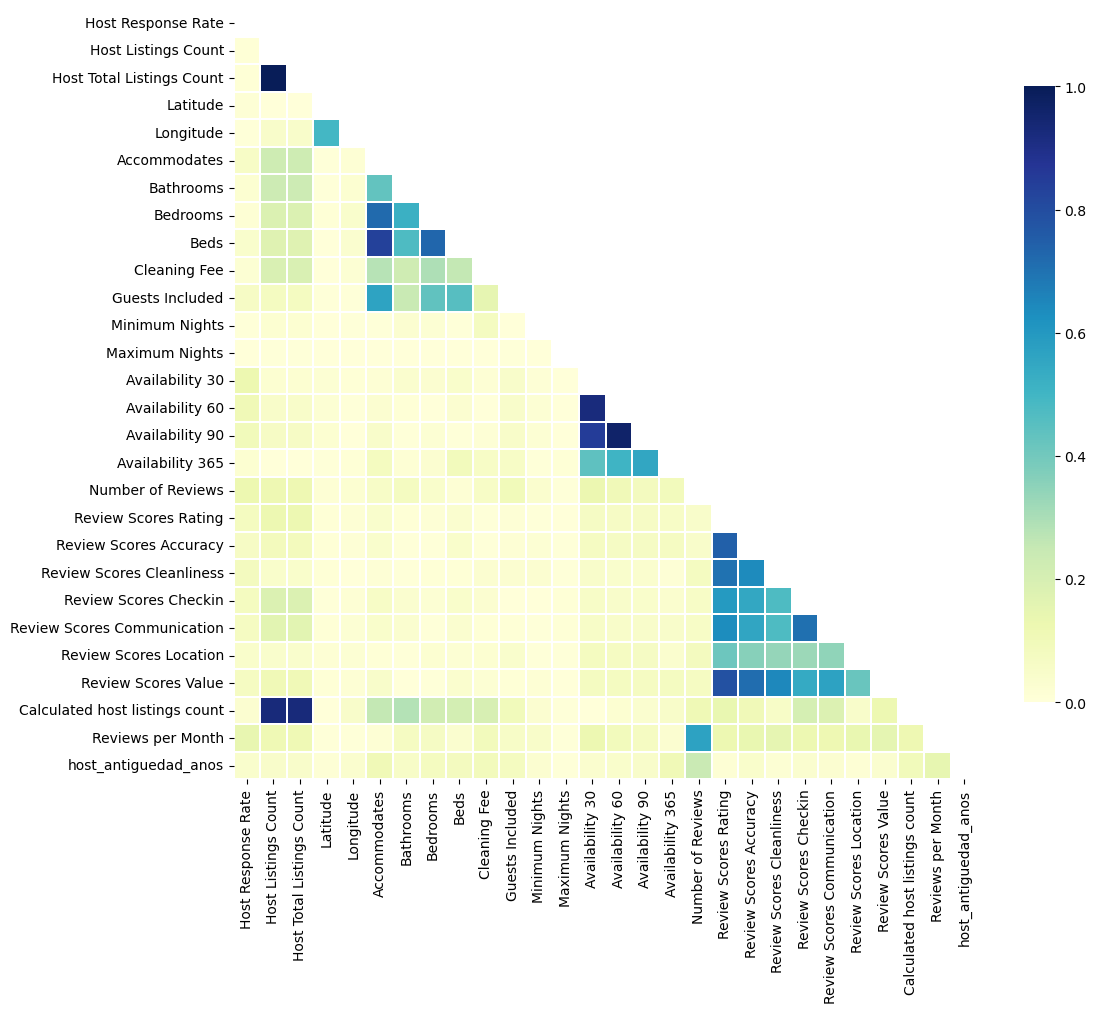

11778
11148
11786
11231
11779
500
413
315


In [11]:
# Cargar archivo
house_data = pd.read_csv("./data/airbnb-listings-train.csv", sep=";")

# Eliminar columnas con muchos nulos (umbral del 5%)
columnas_eliminar = porcentaje_ceros_nulos_columna(house_data, umbral=0.5)
house_data_sc = house_data.drop(columnas_eliminar, axis=1)

# Convertir 'Host Since' a datetime
house_data_sc["Host Since"] = pd.to_datetime(house_data_sc["Host Since"], errors='coerce')

# Calcular antigüedad del host en años
house_data_sc['host_antiguedad_anos'] = ((pd.Timestamp('today') - house_data_sc['Host Since']).dt.days) / 365
house_data_sc['host_antiguedad_anos'] = house_data_sc['host_antiguedad_anos'].astype(float)

# Separar variables numéricas y categóricas
numericas = house_data_sc.select_dtypes(include=['int64', 'float64'])
categoricas = house_data_sc.select_dtypes(include=['object', 'string', 'category'])

# Eliminar columnas no útiles
categoricas_eliminar = ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Description', 'Experiences Offered',
                        'Picture Url', 'Host URL', 'Host Name', 'Host Thumbnail Url', 'Host Picture Url',
                        'Host Verifications', 'Amenities', 'Calendar Updated', 'Calendar last Scraped',
                        'Host Location', 'Geolocation', 'Features', 'Street']

numericas_eliminar = ['ID', 'Scrape ID', 'Host ID']

categorica_f = categoricas.drop(categoricas_eliminar, axis=1)
numericas_f = numericas.drop(numericas_eliminar, axis=1)

# Imputar valores nulos en variables numéricas con la media
for col in numericas_f.columns:
    numericas_f[col] = numericas_f[col].fillna(numericas_f[col].mean())

# Imputar valores nulos en variables categóricas con la moda
for col in categorica_f.columns:
    categorica_f[col] = categorica_f[col].fillna(categorica_f[col].mode().iloc[0])

# Eliminar outliers en 'Host Listings Count' y 'Price'
numericas_no_outlayers = numericas_f.loc[numericas_f['Host Listings Count'] < 350]
####numericas_no_outlayers = numericas_f.loc[numericas_f['Price']< 600]
# Matriz de correlación
corr = np.abs(numericas_no_outlayers.drop(['Price'], axis=1).corr())
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

# Eliminar columnas muy correlacionadas
numericas_no_corr = numericas_no_outlayers.drop(['Calculated host listings count', 'Host Listings Count'], axis=1)

# AÑADIR la variable de antigüedad
##numericas_no_corr['host_antiguedad_anos'] = house_data_sc['host_antiguedad_anos']

# Target encoding de la política de cancelación por barrio
politicas = categorica_f['Cancellation Policy'].unique()
categoricas_encoded = categorica_f.copy()

for politica in politicas:
    nombre_columna = f'barrio_ratio_{politica}'
    proporciones = categoricas_encoded.groupby('Neighbourhood Cleansed')['Cancellation Policy'].apply(lambda x: (x == politica).mean())
    categoricas_encoded[nombre_columna] = categorica_f['Neighbourhood Cleansed'].map(proporciones)

#Codifico la variable 'Host Response Time'

orden_mapa = { 
    'within a few hours':0,
    'within an hour':1,
    'within a day':2,
    'a few days or more':3,
}

categoricas_encoded['Host Response Time'] = categoricas_encoded['Host Response Time'].map(orden_mapa)
categoricas_encoded['Host Response Time'] = categoricas_encoded['Host Response Time'].fillna(-1)


# Comprobación de valores cero en nuevas columnas
print(sum(categoricas_encoded['barrio_ratio_strict_new'] == 0))
print(sum(categoricas_encoded['barrio_ratio_super_strict_30'] == 0))
print(sum(categoricas_encoded['barrio_ratio_flexible_new'] == 0))
print(sum(categoricas_encoded['barrio_ratio_super_strict_60'] == 0))
print(sum(categoricas_encoded['barrio_ratio_moderate_new'] == 0))
print(sum(categoricas_encoded['barrio_ratio_moderate'] == 0))
print(sum(categoricas_encoded['barrio_ratio_flexible'] == 0))
print(sum(categoricas_encoded['barrio_ratio_strict'] == 0))

# Eliminar las columnas con demasiados ceros
categoricas_encoded_f = categoricas_encoded.select_dtypes(include=['int64', 'float64'])
categoricas_encoded_fi = categoricas_encoded_f.drop(['barrio_ratio_strict_new', 'barrio_ratio_super_strict_30',
                                                     'barrio_ratio_flexible_new', 'barrio_ratio_super_strict_60',
                                                     'barrio_ratio_moderate_new'], axis=1)

# Imputar nulos restantes
for col in categoricas_encoded_fi.columns:
    categoricas_encoded_fi[col] = categoricas_encoded_fi[col].fillna(categoricas_encoded_fi[col].mean())

for col in numericas_no_corr.columns:
    numericas_no_corr[col] = numericas_no_corr[col].fillna(numericas_no_corr[col].mean())

# Concatenar variables numéricas y categóricas finales
df_limpio_train = pd.concat([categoricas_encoded_fi, numericas_no_corr], axis=1)

# Asegurar que no queden nulos
for col in df_limpio_train.columns:
    df_limpio_train[col] = df_limpio_train[col].fillna(df_limpio_train[col].mean())


df_limpio_train.isnull().sum()
columnas_modelo = df_limpio_train.columns.tolist()
df_limpio_train = df_limpio_train[columnas_modelo]

Notes tiene 62.75% nulos.
Host Acceptance Rate tiene 99.70% nulos.
Square Feet tiene 95.81% nulos.
Weekly Price tiene 76.01% nulos.
Monthly Price tiene 76.59% nulos.
Security Deposit tiene 59.27% nulos.
Extra People tiene 51.25% ceros.
Has Availability tiene 99.90% nulos.
License tiene 97.56% nulos.
Jurisdiction Names tiene 98.21% nulos.


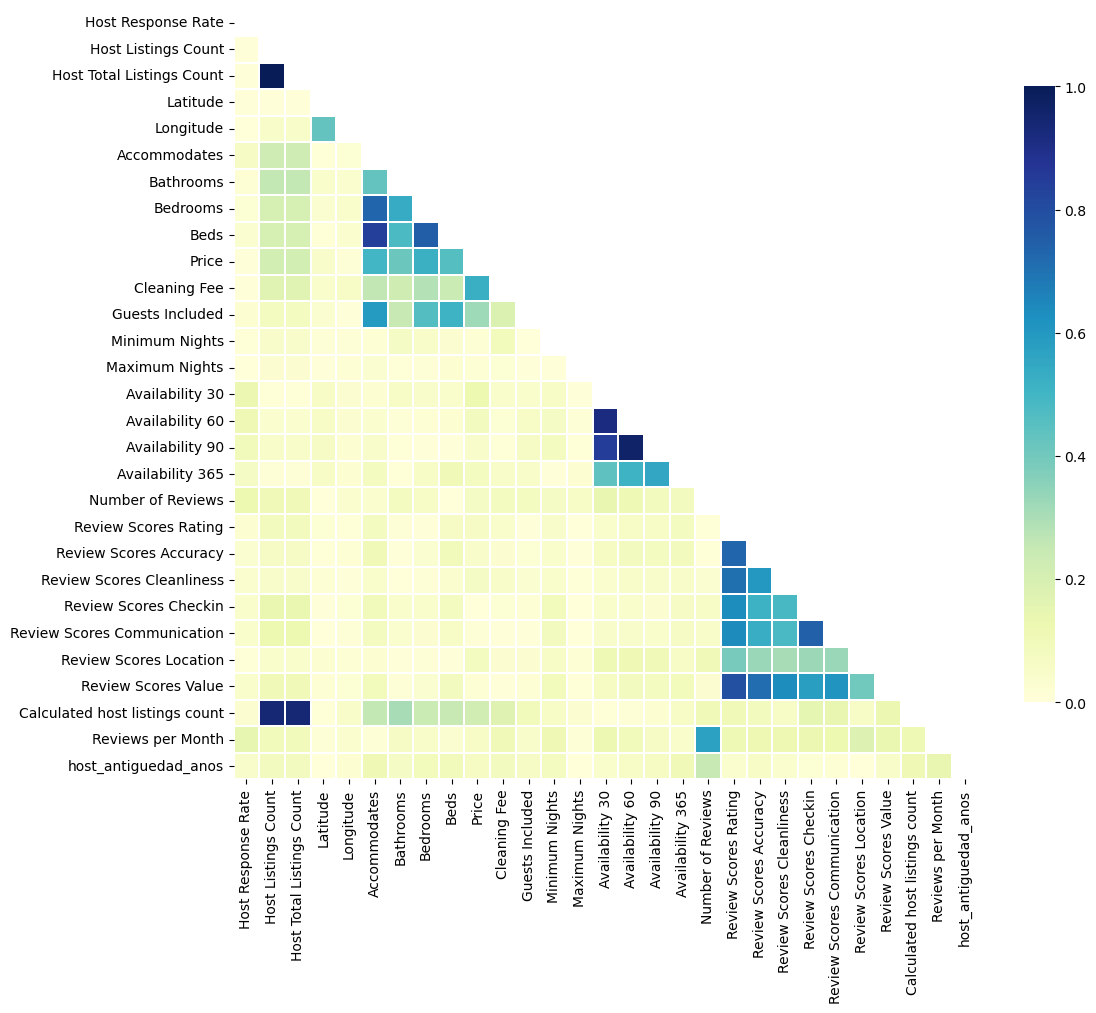

2951
2941
2955
2940
2953
214
170
167


In [48]:
# Cargar datos
house_data_test = pd.read_csv("./data/airbnb-listings-test.csv", sep=";")

# Eliminar columnas con muchos nulos
columnas_eliminar = porcentaje_ceros_nulos_columna(house_data_test, umbral=0.5)
house_data_sc_test = house_data_test.drop(columnas_eliminar, axis=1)

# Convertir 'Host Since' a datetime y calcular antigüedad en años ANTES de eliminar la columna
house_data_sc_test["Host Since"] = pd.to_datetime(house_data_sc_test["Host Since"], errors='coerce')
house_data_sc_test['host_antiguedad_anos'] = ((pd.Timestamp('today') - house_data_sc_test['Host Since']).dt.days) / 365

# Separar columnas categóricas y numéricas
numericas_test = house_data_sc_test.select_dtypes(include=['int64', 'float64'])
categoricas_test = house_data_sc_test.select_dtypes(include=['object', 'string', 'category'])

# Eliminar columnas no informativas o redundantes
categoricas_eliminar = ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Description', 'Experiences Offered',
                        'Picture Url', 'Host URL', 'Host Name', 'Host Thumbnail Url', 'Host Picture Url', 
                        'Host Verifications', 'Amenities', 'Calendar Updated', 'Calendar last Scraped', 
                        'Host Location', 'Geolocation', 'Features', 'Street']

numericas_aliminar = ['ID', 'Scrape ID', 'Host ID']
categorica_f_test = categoricas_test.drop(categoricas_eliminar, axis=1)
numericas_f_test = numericas_test.drop(numericas_aliminar, axis=1)

# Rellenar valores nulos con la media en variables numéricas
for col in numericas_f_test.columns:
    numericas_f_test[col] = numericas_f_test[col].fillna(numericas_f_test[col].mean())

numericas_f_test.isnull().any()

# Rellenar valores nulos con la moda en variables categóricas
for col in categorica_f_test.columns:
    categorica_f_test[col] = categorica_f_test[col].fillna(categorica_f_test[col].mode().iloc[0])

categorica_f_test.isnull().any()

# Eliminar outliers en 'Host Listings Count'
numericas_no_outlayers_test = numericas_f_test.loc[numericas_f_test['Host Listings Count'] < 350]

# Ver correlaciones
corr_test = np.abs(numericas_no_outlayers_test.corr())
mask = np.zeros_like(corr_test, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_test, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

# Eliminar variables altamente correlacionadas
numericas_no_corr_test = numericas_no_outlayers_test.drop(['Calculated host listings count', 'Host Listings Count'], axis=1)

# AÑADIR la variable que creamos antes, y asegurarse de que es float
numericas_no_corr_test['host_antiguedad_anos'] = house_data_sc_test['host_antiguedad_anos']

# Target encoding de la política de cancelación por barrio
politicas = categorica_f_test['Cancellation Policy'].unique()
categoricas_encoded_test = categorica_f_test.copy()

for politica in politicas:
    nombre_columna = f'barrio_ratio_{politica}'
    proporciones = categoricas_encoded_test.groupby('Neighbourhood Cleansed')['Cancellation Policy'].apply(lambda x: (x == politica).mean())
    categoricas_encoded_test[nombre_columna] = categorica_f_test['Neighbourhood Cleansed'].map(proporciones)

orden_mapa = { 
    'within a few hours':0,
    'within an hour':1,
    'within a day':2,
    'a few days or more':3,
}

categoricas_encoded_test['Host Response Time'] = categoricas_encoded_test['Host Response Time'].map(orden_mapa)
categoricas_encoded_test['Host Response Time'] = categoricas_encoded_test['Host Response Time'].fillna(-1)

# Ver cuántos ceros hay en cada una para decidir cuáles mantener
print(sum(categoricas_encoded_test['barrio_ratio_strict_new'] == 0))
print(sum(categoricas_encoded_test['barrio_ratio_super_strict_30'] == 0))
print(sum(categoricas_encoded_test['barrio_ratio_flexible_new'] == 0))
print(sum(categoricas_encoded_test['barrio_ratio_super_strict_60'] == 0))
print(sum(categoricas_encoded_test['barrio_ratio_moderate_new'] == 0))
print(sum(categoricas_encoded_test['barrio_ratio_moderate'] == 0))
print(sum(categoricas_encoded_test['barrio_ratio_flexible'] == 0))
print(sum(categoricas_encoded_test['barrio_ratio_strict'] == 0))

# Eliminar columnas que no aportan
categoricas_encoded_f_test = categoricas_encoded_test.select_dtypes(include=['int64', 'float64'])
categoricas_encoded_fi_test = categoricas_encoded_f_test.drop(['barrio_ratio_strict_new','barrio_ratio_super_strict_30',
                                                                'barrio_ratio_flexible_new','barrio_ratio_super_strict_60',
                                                                'barrio_ratio_moderate_new'], axis=1)

# Rellenar nulos con la media en estas columnas también
for col in categoricas_encoded_fi_test.columns:
    categoricas_encoded_fi_test[col] = categoricas_encoded_fi_test[col].fillna(categoricas_encoded_fi_test[col].mean())

# Nos aseguramos que numéricas estén bien definidas
numericas_no_corr_test = numericas_no_corr_test.select_dtypes(include=['int64', 'float64'])

# Unir numéricas y categóricas finales
df_limpio_test = pd.concat([categoricas_encoded_fi_test, numericas_no_corr_test], axis=1)

# Asegurar que no quedan nulos finales
for col in df_limpio_test.columns:
    df_limpio_test[col] = df_limpio_test[col].fillna(df_limpio_test[col].mean())

df_limpio_test.isnull().any()
df_limpio_test= df_limpio_test[columnas_modelo]

In [47]:
"""
En el anilisis exploratorio inicial puedo ver el tipo de Dataset que es, tipos de datos, nulos y valores anomalos. Veo que hay muchas variables
categoricas que si quiero usarlas voy a a tener que transformarlas "enconding" para que el modelo pueda extraer la informacion.Con la correlacion 
veo que hay un par de variables que estan totalmente correlacionadas y eso es porque son las mismas asique las quito.

INtento dejar lo mas abierto posible el codigo de cara a poder seguir probando con otras variables. En un primer momento el modelo lo ajuste con la
funcion de seleccion 'porcentaje_ceros_nulos_columna' al umbral 0.05 siguiedo tus recomendaciones de hacerlo primero sencillo. El tema es que me daba
mejor resultado antes, tampoco mucho mejor, pero bueno ahora porbando con columnas que tienen un 0.5 de nulos o ceros.

"""

'\nComo conclusiones en este primer apartado \n'

In [48]:
df_limpio_test.shape


(2956, 31)

In [15]:
#Separamos y prepramos los datos 

from sklearn import preprocessing

# Dataset de train
data_train = df_limpio_train
y_train = data_train['Price'].to_numpy()    # nos quedamos con la 1ª columna, price
x_train = data_train.drop(columns='Price').to_numpy()      # nos quedamos con el resto

# Dataset de test
data_test = df_limpio_test
y_test = data_test['Price'].to_numpy()     # nos quedamos con la 1ª columna, price
x_test = data_test.drop(columns='Price').to_numpy()     # nos quedamos con el resto

In [17]:
#Escalamos los datos 
#Buscamos un escalador de nuestras variables, como estoy usando columnas categoricas hay que separar las numericas para el escalado
#columnas_escalar = x_train.select_dtypes(include=['float64', 'int64']).columns


XtrainScaled = x_train.copy()
XtestScaled = x_test.copy()
scaler= preprocessing.StandardScaler().fit(x_train)
#Ajustamos las variables al escalador
XtrainScaled = scaler.transform(x_train)
#Con el mismo escalador le aplicamos a test
XtestScaled = scaler.transform(x_test)

In [19]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)
print(type(XtrainScaled))
print(type(XtestScaled))

Datos entrenamiento:  (11824, 30)
Datos test:  (2956, 30)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


modelo_lr = LinearRegression()
modelo_lr.fit(XtrainScaled, y_train)
y_pred_lr = modelo_lr.predict(XtestScaled)

In [23]:
from utils import plot_decision_boundary

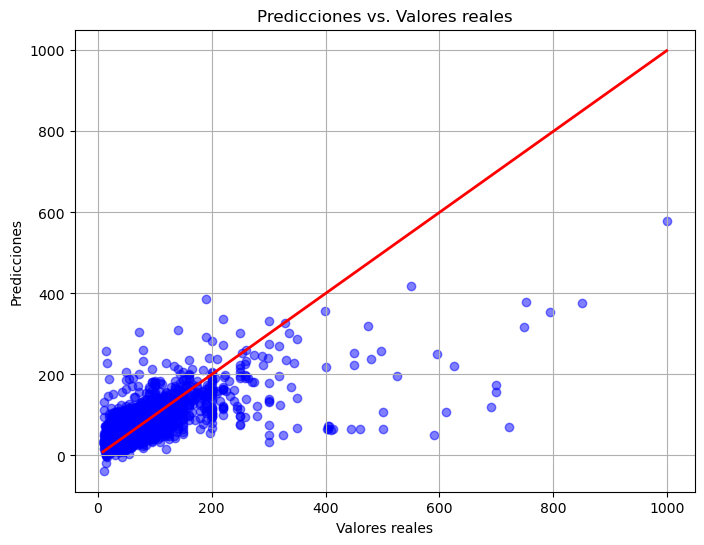

In [25]:
import matplotlib.pyplot as plt

# Graficamos las predicciones frente a los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Línea de igualdad
plt.title("Predicciones vs. Valores reales")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.grid(True)
plt.show()


In [ ]:
""""
En este primer modelo de regresion lineal se puede ver que el modelo no generaliza muy bien, porque al principiohay mucho datos podria parecer
que sabe lo que hace pero cuando el precio sube la prediciones fallan
""""

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred_lr)

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred_lr)

# Calcular el R
r2 = r2_score(y_test, y_pred_lr)

# Imprimir el MSE y R y MAE
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")

Error Cuadrático Medio (MSE): 2924.886115388291
R² (Coeficiente de determinación): 0.4623
Error Absoluto Medio (MAE): 28.3004


In [ ]:
"""
La regresion lineal no nos da bueno resultado, mas o menos lo sabiamos porque no se veia relacion lineal entre las variables
"""

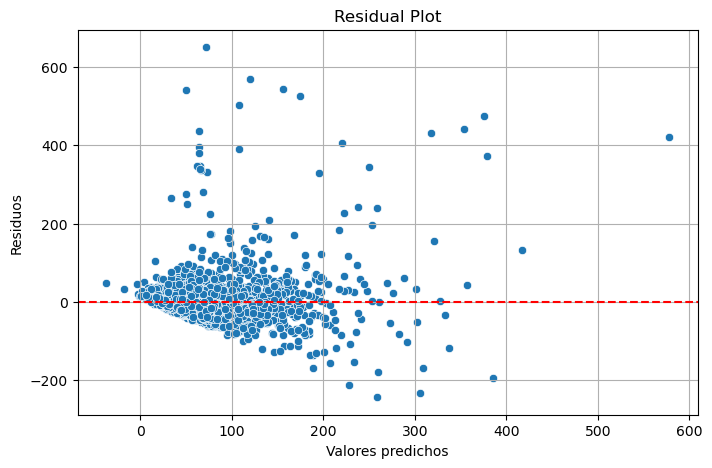

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos los residuos
residuos = y_test - y_pred_lr

# Graficamos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_lr, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


Fitting 3 folds for each of 20 candidates, totalling 60 fits
best mean cross-validation score: -2955.596
best parameters: {'alpha': 0.1}


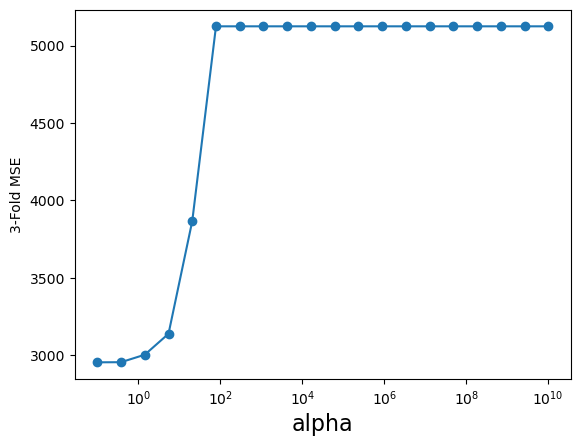

In [31]:
#Modelo de LR con CrossValidation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector_l = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector_l }
# podemos probar n_jobs=-1 para paralelizar el entrenamiento, no hizo mucha diferencia en mi caso
grid_l = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2, n_jobs=-1)
grid_l.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_l.best_score_))
print("best parameters: {}".format(grid_l.best_params_))


#-1 porque es negado
scores = -1*np.array(grid_l.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector_l,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [32]:
#Un alpha pequeño indica que le estamos dando poco peso a la regularizacion, habria que probar con otros modelos otras caracteristicas etc

In [33]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid_l.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = house_data.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.9e+03
MSE Modelo Lasso (test) : 2.93e+03
RMSE Modelo Lasso (train): 53.9
RMSE Modelo Lasso (test) : 54.1
Listing Url 0.48638313412170653
Scrape ID -3.9269395706574444
Last Scraped -4.673680799518261
Name -0.0
Summary -0.2841162700563964
Space 2.7533257585482738
Description -1.048639339165946
Experiences Offered -0.7005654007416725
Neighborhood Overview 27.795684675932552
Notes 6.883901763463981
Transit 10.398261485242276
Access -9.606225494600707
Interaction 19.788729256054598
House Rules 0.0
Thumbnail Url -0.052205428117712484
Medium Url 0.0
Picture Url 12.575580037844032
XL Picture Url -0.0
Host ID -5.080416603121401
Host URL -1.1173891852409443
Host Name -1.5544903890408353
Host Since 2.970995224710052
Host Location 2.0036204613421473
Host About 1.7092225226923112
Host Response Time 0.0
Host Response Rate -0.5325018675375648
Host Acceptance Rate 3.500371994045743
Host Thumbnail Url -2.446495456199754
Host Picture Url -1.2702348360534306
Host Neighbourhood

In [ ]:
"""
Probando con Lasso y usando validacion cruzada sacando el alpha optimo nos da lo mismo 
"""

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calcular el MSE
mse = mean_squared_error(y_test, ytestLasso)

# Calcular el MAE
mae = mean_absolute_error(y_test, ytestLasso)

# Calcular el R
r2 = r2_score(y_test, ytestLasso)

# Imprimir el MSE y R y MAE
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")

Error Cuadrático Medio (MSE): 2925.637236098483
R² (Coeficiente de determinación): 0.4622
Error Absoluto Medio (MAE): 28.2445


best parameters: {'alpha': 17.78279410038923}


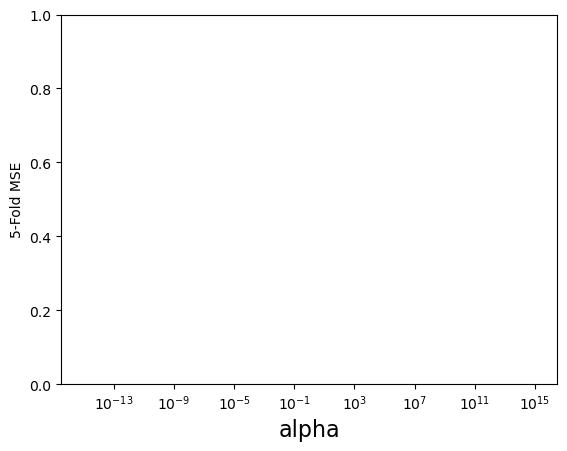

In [66]:
from sklearn.linear_model import Ridge
# Por convención, GridSearchCV siempre intenta MAXIMIZAR los resultados, por lo que
# funciones de coste, como MSE, tienen que ir negadas: https://github.com/scikit-learn/scikit-learn/issues/2439
# Por eso aparece neg_mean_squared_error y por eso hay luego un -1 multiplicando

alpha_vector_r = np.logspace(-15,15,25)
param_grid = {'alpha': alpha_vector_r}
grid_r = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid_r.fit(XtrainScaled, y_train)
print("best parameters: {}".format(grid_r.best_params_))

scores = -1*np.array(grid_r.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector_r,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show()



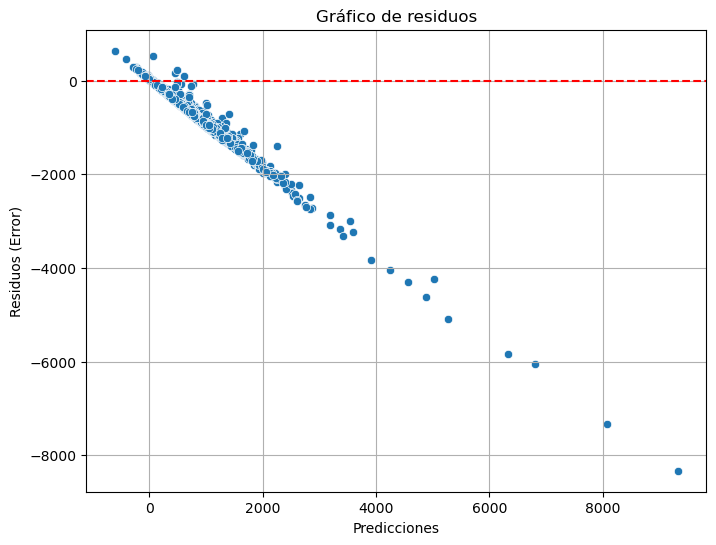

In [43]:
alpha_optimo = grid_r.best_params_['alpha']

ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled, y_train)

# predicción
y_hat = ridge.predict(x_test)
w = ridge.coef_
norm_w2 = np.dot(w,w.T)

# error

error_test = np.mean(np.power(y_test - y_hat,2)) 

import matplotlib.pyplot as plt
import seaborn as sns

# Residuales
residuals = y_test - y_hat

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_hat, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de residuos")
plt.xlabel("Predicciones")
plt.ylabel("Residuos (Error)")
plt.grid(True)
plt.show()


In [ ]:
#Se ve que hay overfitting porque se ajusta demasiado a los datos, creo que hay por ahi unos datos que se desvian mucho y engañan al modelo

In [45]:
# Calcular el MSE
mse = mean_squared_error(y_test, y_hat)

# Calcular el MAE
mae = mean_absolute_error(y_test, y_hat)

# Calcular el R
r2 = r2_score(y_test, y_hat)

# Imprimir el MSE y R y MAE
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")

Error Cuadrático Medio (MSE): 654801.4745733921
R² (Coeficiente de determinación): -119.3698
Error Absoluto Medio (MAE): 642.1143


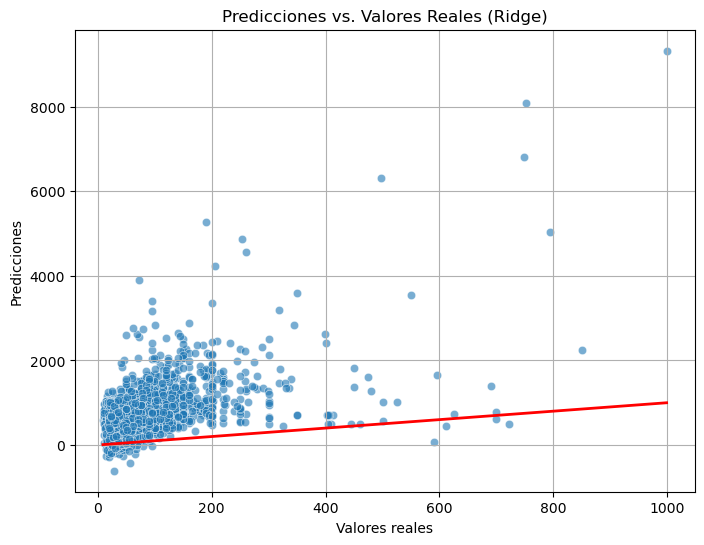

In [129]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales (Ridge)")
plt.grid(True)
plt.show()


In [ ]:
#HE ELEJIDO RANDOMFOREST PORQUE EN LOS PLOT DE CORRELACION NO SE VEIA MUCHA LINEALIDAD ENTRE LAS VARIABLES Y PODRIA SIGNIFICAR QUE LA RELACION FUERA NO
#LINEAL Y RF NOS PUEDE AYUDAR A ENCONTRAR ESAS RELACIONES NO LINEALES

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=2; total time=   1.1s
[CV] END ........................................max_depth=2; total time=   1.3s
[CV] END ........................................max_depth=3; total time=   1.8s
[CV] END ........................................max_depth=3; total time=   1.7s
[CV] END ........................................max_depth=3; total time=   2.0s
[CV] END ........................................max_depth=4; total time=   2.6s
[CV] END ........................................max_depth=4; total time=   2.1s
[CV] END .......................................

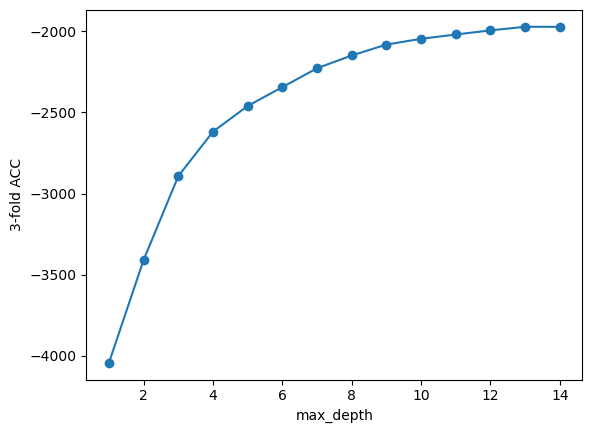

In [47]:
#Ahora voy a modelar con Random Forest para comparar
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=0, ), param_grid=tuned_parameters, cv=3, scoring="neg_mean_squared_error", verbose=2)
grid_rf.fit(x_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_rf.best_score_))
print("best parameters: {}".format(grid_rf.best_params_))

scores = np.array(grid_rf.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('3-fold ACC')

plt.show()


In [53]:
tuned_parameters = {'n_estimators': range(0,400,25)}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=0, max_depth = 13),
                       param_grid=tuned_parameters, cv=3, scoring="neg_mean_squared_error", verbose=2)
grid_rf.fit(x_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_rf.best_score_))
print("best parameters: {}".format(grid_rf.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....................................n_estimators=0; total time=   0.0s
[CV] END .....................................n_estimators=0; total time=   0.0s
[CV] END .....................................n_estimators=0; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   3.7s
[CV] END ....................................n_estimators=50; total time=   3.7s
[CV] END ....................................n_estimators=50; total time=   4.1s
[CV] END ...................................n_estimators=100; total time=   8.1s
[CV] END ...................................n_estimators=100; total time=   7.8s
[CV] END ...................................n_estimators=100; total time=   7.8s
[CV] END ...................................n_estimators=150; total time=  11.6s
[CV] END ...................................n_estimators=150; total time=  12.2s
[CV] END ...................................n_es

C:\Users\Luis B\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Luis B\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Luis B\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Luis B\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Luis B\anaconda3\Lib\site-packag

best mean cross-validation score: -1966.929
best parameters: {'n_estimators': 300}


In [59]:
model_rf = RandomForestRegressor(random_state=0, max_depth = 7, n_estimators=300,max_features='sqrt')
model_rf.fit(x_train, y_train)

print("Train R: ",model_rf.score(x_train,y_train))
print("Test R: ",model_rf.score(x_test,y_test))

Train R:  0.6758287602407685
Test R:  0.5472523943893708


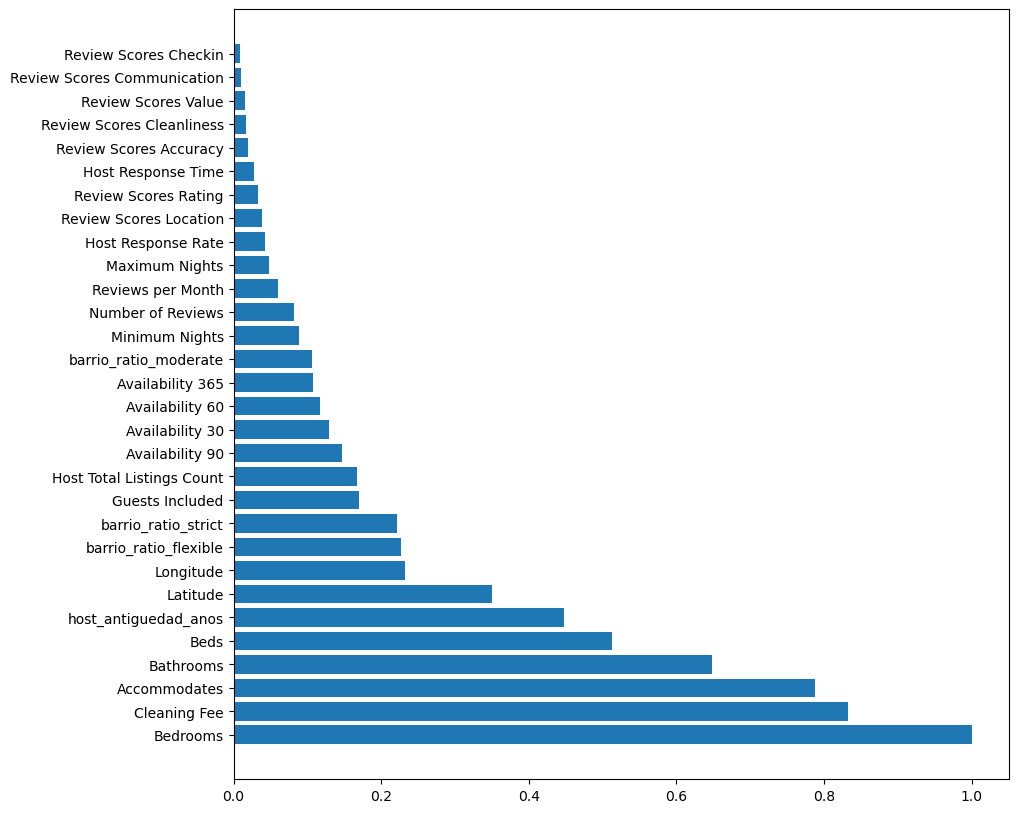

In [61]:
importances = model_rf.feature_importances_
importances = importances / np.max(importances)
features = data_train.columns.drop(['Price'])

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(x_train.shape[1]),importances[indices])
plt.yticks(range(x_train.shape[1]),features[indices])
plt.show()

In [ ]:
""""
Con RandoForest mejora un poco la cosa pero se envidencia que hace falta encontrar alguna variable nueva que le aporte un poco mas de informacion 
al modelo.
A partir de esto filtrare la informacion centrandome solo en los datos de Madrid, para que sea mas robusto el modelo ya que es de los que mas hay
,aprovechando variables que tienen mucho peso como los metros cuadrados(imputandolos con algun modelo), la localizacion y codificando variables 
como el barrio, estos datos podrian darle mas consistencia al modelo y mejorar.

""""